# Data Exploration

## Understanding our data

#### Import and load

In [9]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.figure_factory as ff
import plotly.offline as pyo
import numpy as np
from sklearn.ensemble import IsolationForest
import scipy.stats as stats

In [10]:
# Load dataset
df = pd.read_csv('creditcard.csv')
df_modified = df.copy()

#### Basic info

In [11]:
# Basic info
print(df.shape)
print(df.head(5))
print(df.describe())
print(df.info())
print(df.isnull().sum())
print(df['Class'].value_counts())
print(df.columns)


(284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V

#### Duplicates

In [12]:
# Duplicated rows
df_duplicated = df[df.duplicated(keep=False)]
print(df_duplicated.shape)

df_duplicated.head(4)

(1854, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0


In [13]:
# Delete duplicated rows 
def del_duplicated(df: pd.DataFrame) -> pd.DataFrame:
    """Delete duplicated rows 

    Args:
        df (Pandas Dataframe): Dataframe to be cleaned

    Returns:
        Pandas Dataframe: Dataframe without duplicated rows
    """
    df.drop_duplicates(inplace=True)
    return df

In [14]:
# Remove duplicated rows
df_modified = del_duplicated(df_modified)

#### Visualization of distributions

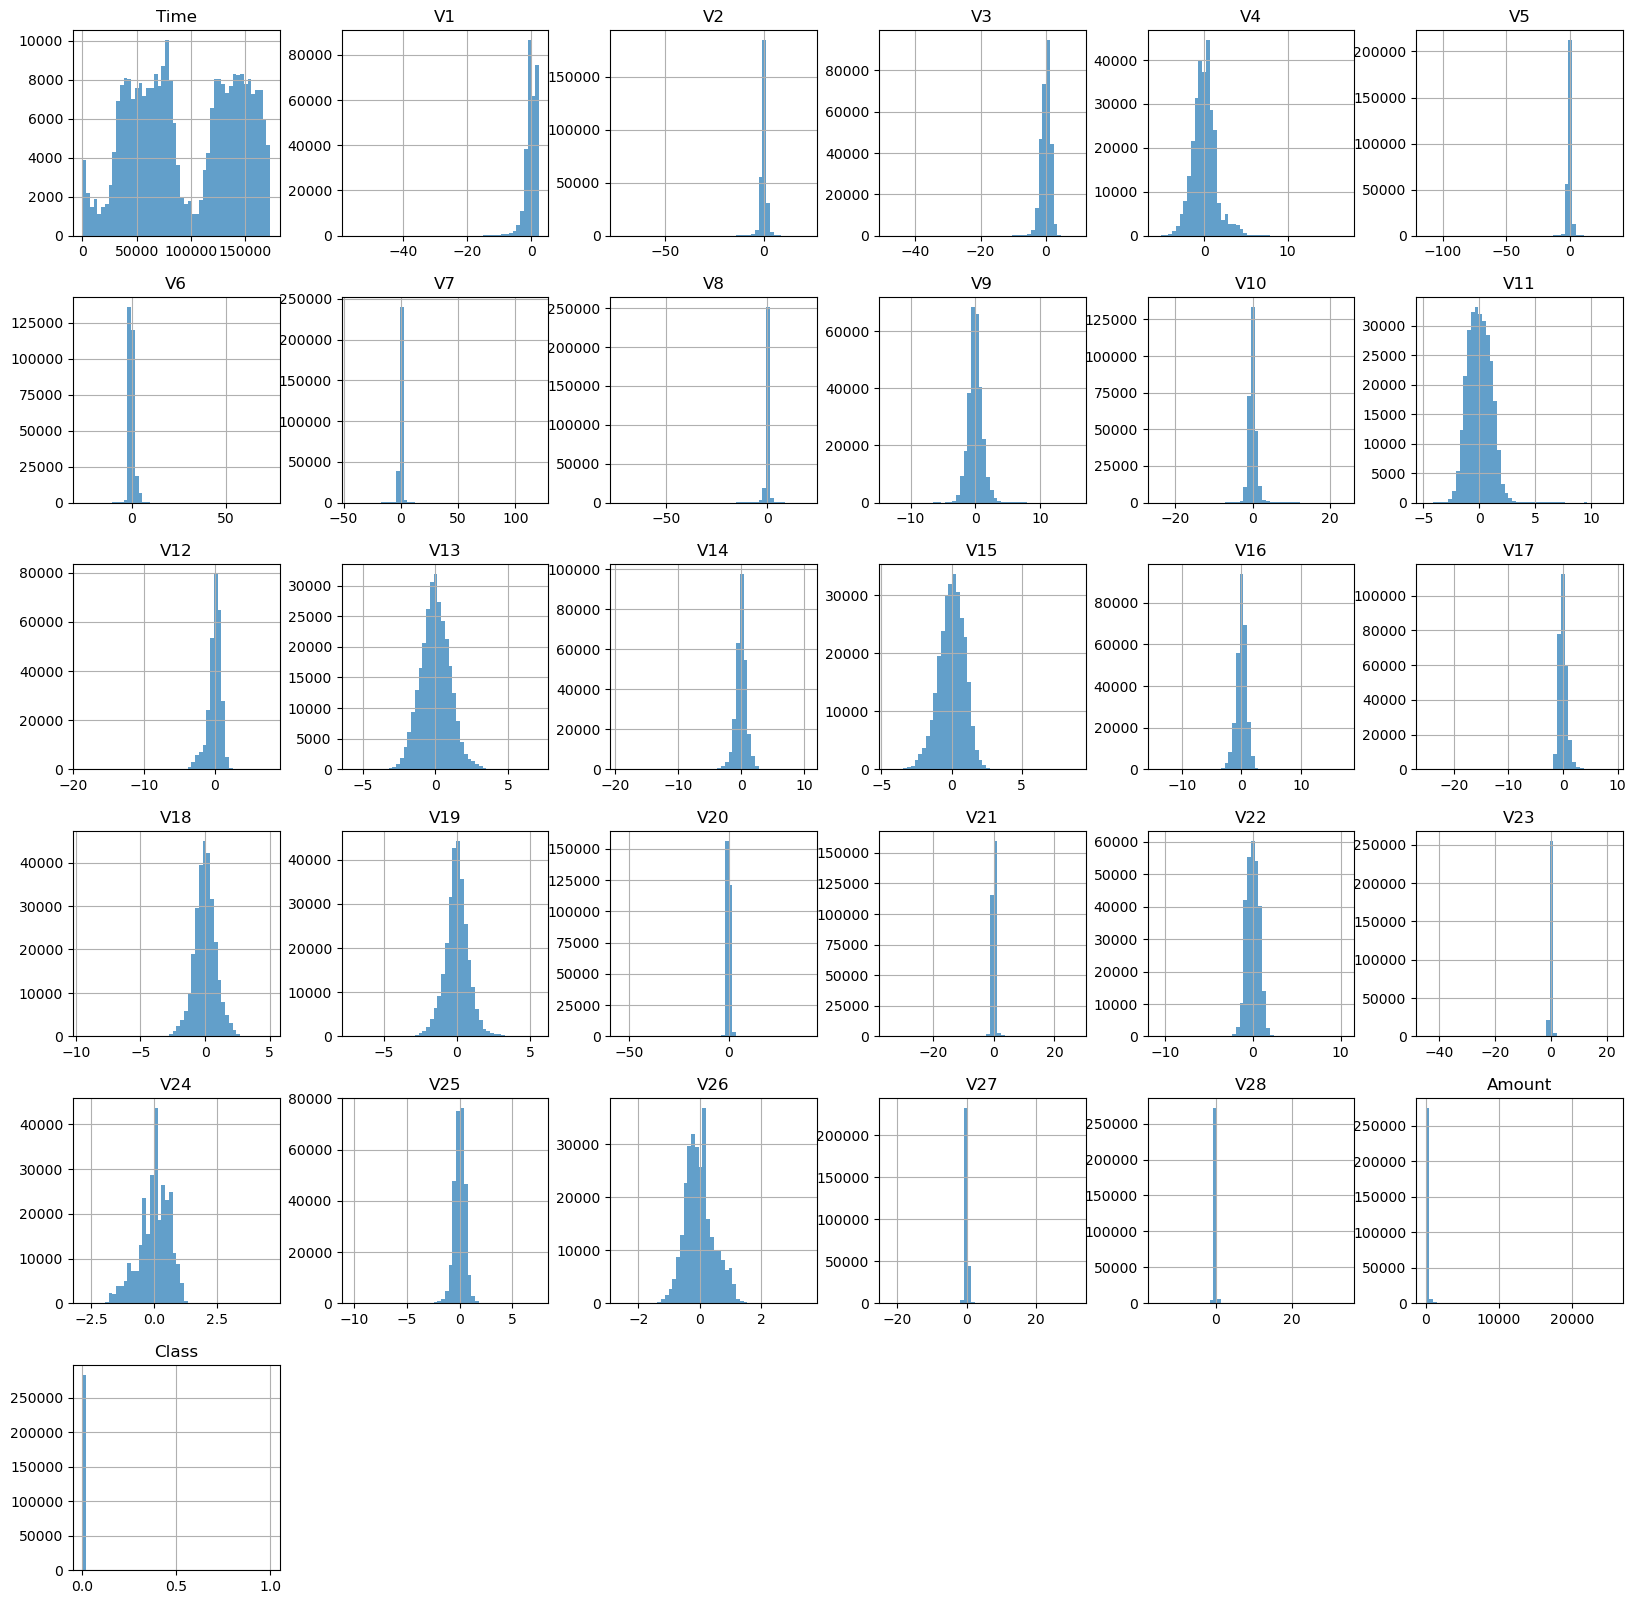

In [15]:
# Plot of histogram
# x: features values
# y: frequency 

df_modified.hist(figsize=(20,20), bins=50, alpha=0.7)
plt.show()

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_

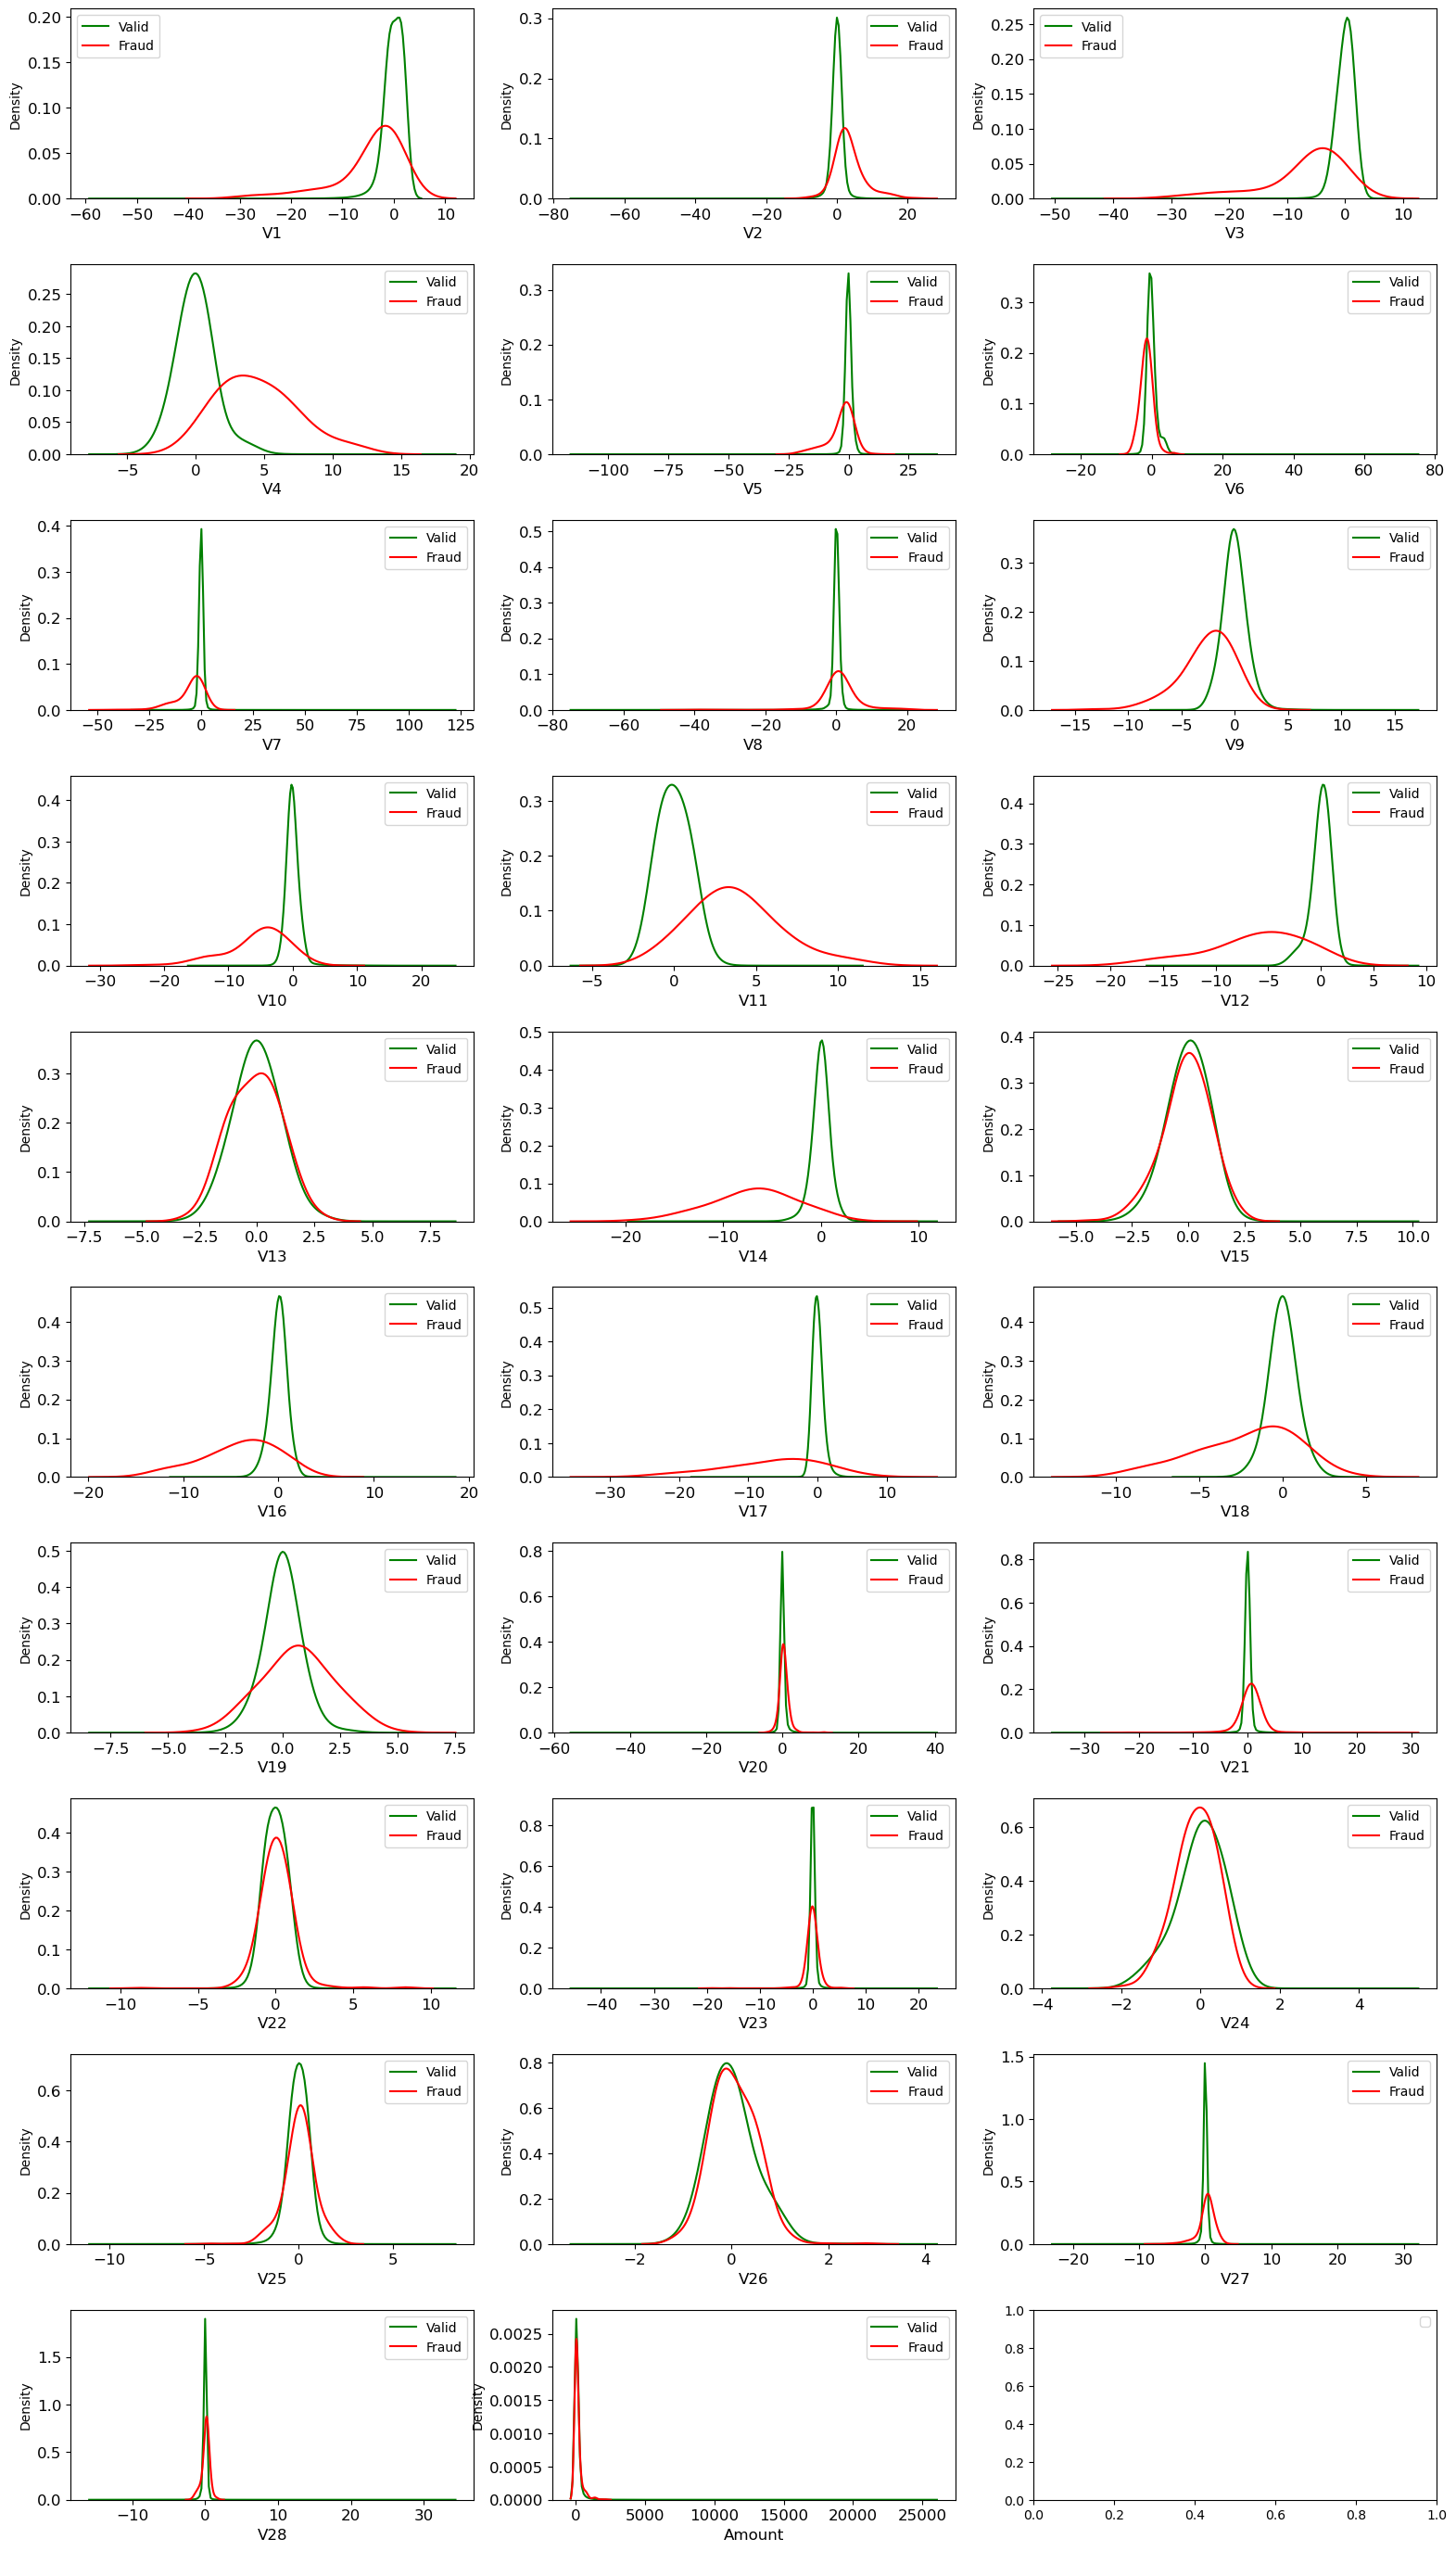

In [16]:
# Credit Card Fraud Transactions Features Distribution for Fraud and Non-Fraud
    
# Ignore UserWarnings
warnings.simplefilter(action='ignore', category=UserWarning)

# save df_modified.columns.values except Time and Class because the distribution is not needed to be analyzed
var = df_modified.columns.values[1:-1]

fig, axes = plt.subplots(10,3,figsize=(16,28))
# Adjust the layout
fig.tight_layout(pad=3.0)  

t0 = df_modified.loc[df_modified['Class'] == 0]
t1 = df_modified.loc[df_modified['Class'] == 1]

for i, feature in enumerate(var):
    row, col = i // 3, i % 3
    ax = axes[row, col]
    
    sns.kdeplot(t0[feature], bw=0.5, label="Valid", color='green', ax=ax)
    sns.kdeplot(t1[feature], bw=0.5, label="Fraud", color='red', ax=ax)
    
    ax.set_xlabel(feature, fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.legend()

# Add legend to the last plot
axes[-1, -1].legend()

plt.show()

For some of the features we can observe a good selectivity in terms of distribution for the two values of Class: V4, V11 have clearly separated distributions for Class values 0 and 1, V12, V14, V18 are partially separated, V1, V2, V3, V10 have a quite distinct profile, whilst V25, V26, V28 have similar profiles for the two values of Class.

In general, with just few exceptions (Time and Amount), the features distribution for legitimate transactions (values of Class = 0) is centered around 0, sometime with a long queue at one of the extremities. In the same time, the fraudulent transactions (values of Class = 1) have a skewed (asymmetric) distribution.

In [17]:
# Determine number of fraud cases in dataset

Fraud = df_modified[df_modified['Class'] == 1]
Valid = df_modified[df_modified['Class'] == 0]
outlier_fraction = len(Fraud) / float(len(Valid))
print(outlier_fraction)
print('Fraud Cases: {}'.format(len(Fraud)))
print('Valid Cases: {}'.format(len(Valid)))


0.0016698852262818046
Fraud Cases: 473
Valid Cases: 283253


#### Missing and NAN values

In [18]:
# Missing values
print(sum(df_modified.isnull().sum()))

# NaN values
print(sum(df_modified.isna().sum()))

0
0


#### Class balance visualization

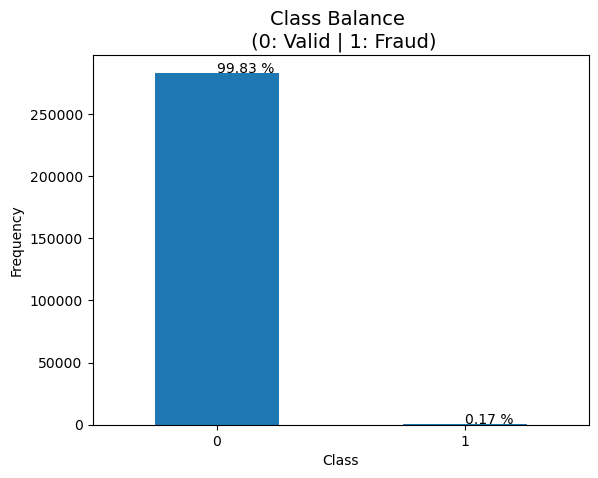

In [19]:
# Visualizing the class balance

# change pandas.value_counts to a non-deprecated function
count_classes = df_modified['Class'].value_counts(sort=True)
count_classes.plot(kind='bar', rot=0)

plt.title('Class Balance \n (0: Valid | 1: Fraud)', fontsize=14)
plt.xticks(range(2))
plt.xlabel('Class')
plt.ylabel('Frequency')

for index, value in enumerate(count_classes):
    plt.text(index, value, f"{round((value/len(df_modified['Class']))*100, 2)} %")
plt.show()


#### Basic info of transactions

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64


c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.

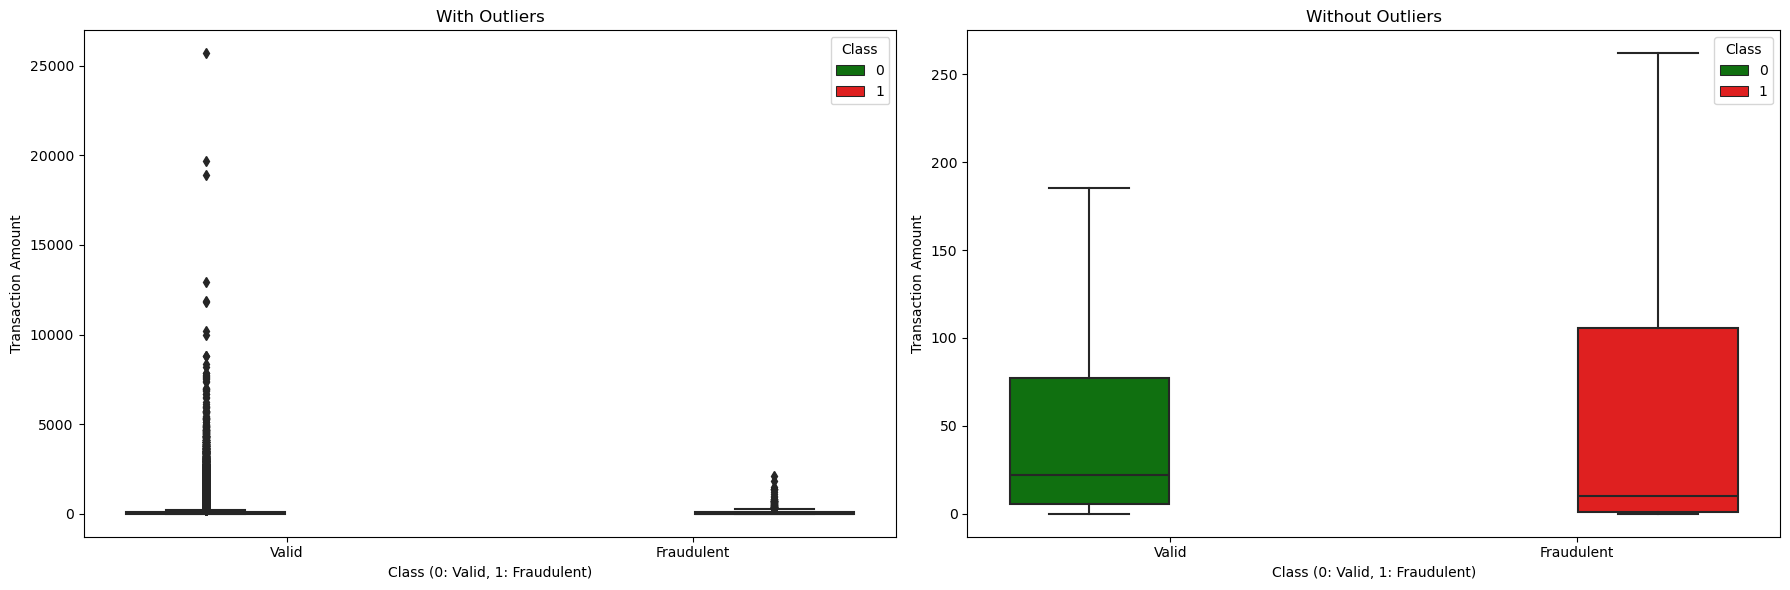

In [20]:
# mean amount of money per transaction by fraudulent transactions
print(Fraud.Amount.describe())
print(Valid.Amount.describe())

# Boxplot outliers and whiskers 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

sns.boxplot(ax=ax1, x="Class", y="Amount", hue="Class", data=df_modified, palette={1: 'red', 0: 'green'}, showfliers=True)
ax1.set_title('With Outliers')
ax1.set_xlabel('Class (0: Valid, 1: Fraudulent)')
ax1.set_ylabel('Transaction Amount')
ax1.set_xticklabels(['Valid', 'Fraudulent'])

sns.boxplot(ax=ax2, x="Class", y="Amount", hue="Class", data=df_modified, palette={1: 'red', 0: 'green'}, showfliers=False)
ax2.set_title('Without Outliers')
ax2.set_xlabel('Class (0: Valid, 1: Fraudulent)')
ax2.set_ylabel('Transaction Amount')
ax2.set_xticklabels(['Valid', 'Fraudulent'])

plt.tight_layout()
plt.show()

#### Correlation matrix - before sampling data

In [21]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Shuffle the data before creating the subsamples
df_modified = df_modified.sample(frac=1)

# Get the fraud transactions
_fraud_df = df_modified[df_modified['Class'] == 1]

# Get the number of fraud transactions
num_fraud = len(_fraud_df)
print(num_fraud)

# Extract an equal number of non-fraud transactions
_non_fraud_df = df_modified[df_modified['Class'] == 0].iloc[:num_fraud]

normal_distributed_df = pd.concat([_fraud_df, _non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

473


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
55401,46925.0,-0.481531,1.059542,0.647117,0.905586,0.819368,-0.091184,0.504135,0.161064,-0.765054,...,0.070633,0.192491,-0.174659,-0.438908,0.239259,-0.217823,-0.072852,0.010463,1.00,1
42549,41147.0,-5.314173,4.145944,-8.532522,8.344392,-5.718008,-3.043536,-10.989185,3.404129,-6.167234,...,2.331466,0.862996,-0.614453,0.523648,-0.712593,0.324638,2.245091,0.497321,88.23,1
100777,67619.0,0.108189,0.550559,0.188869,1.413152,0.217107,0.392678,0.943760,-0.105021,-0.502115,...,0.260231,0.649759,0.199674,-1.007974,-0.898892,-0.186386,0.253722,0.255356,144.00,0
252124,155662.0,-1.928613,4.601506,-7.124053,5.716088,1.026579,-3.189073,-2.261897,1.185096,-4.441942,...,0.602291,-0.541287,-0.354639,-0.701492,-0.030973,0.034070,0.573393,0.294686,0.77,1
61787,49985.0,-1.554216,1.694229,-0.903334,2.425436,-2.899787,0.133028,-0.286226,0.555945,-1.394918,...,0.493436,0.733393,0.202350,0.492054,-0.183791,-0.199917,0.395201,0.027693,360.00,1


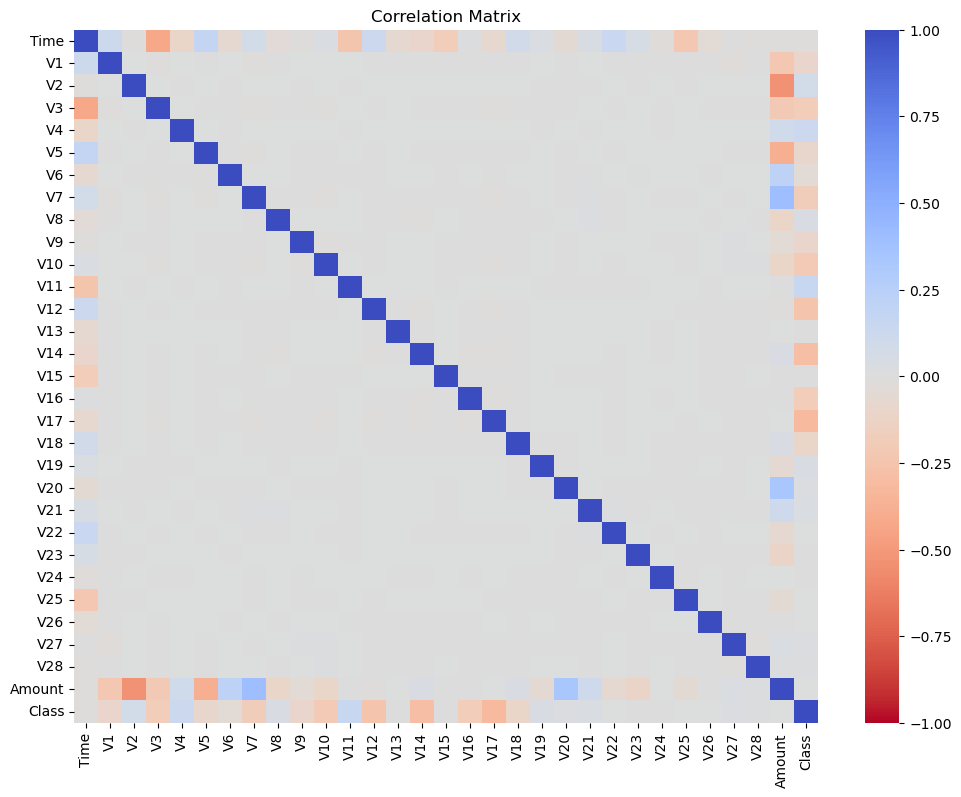

In [22]:
# Correlation Matrix
corrmat = df_modified.corr()
fig = plt.figure(figsize=(12, 9))
sns.heatmap(corrmat, cmap='coolwarm_r', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

PCA (Principal Component Analysis) is a dimensionality reduction method that transforms features into orthogonal components. As a result, the transformed features (principal components) are uncorrelated with each other. Therefore, for the PCA-derived features (V1, V2, ... V28), a correlation matrix would show little to no correlation between them.
However, it's still valuable to check the correlation of non-PCA features (Time and Amount) with the target variable (Class). This can help determine if there's any relationship between these features and the probability of a transaction being fraudulent.

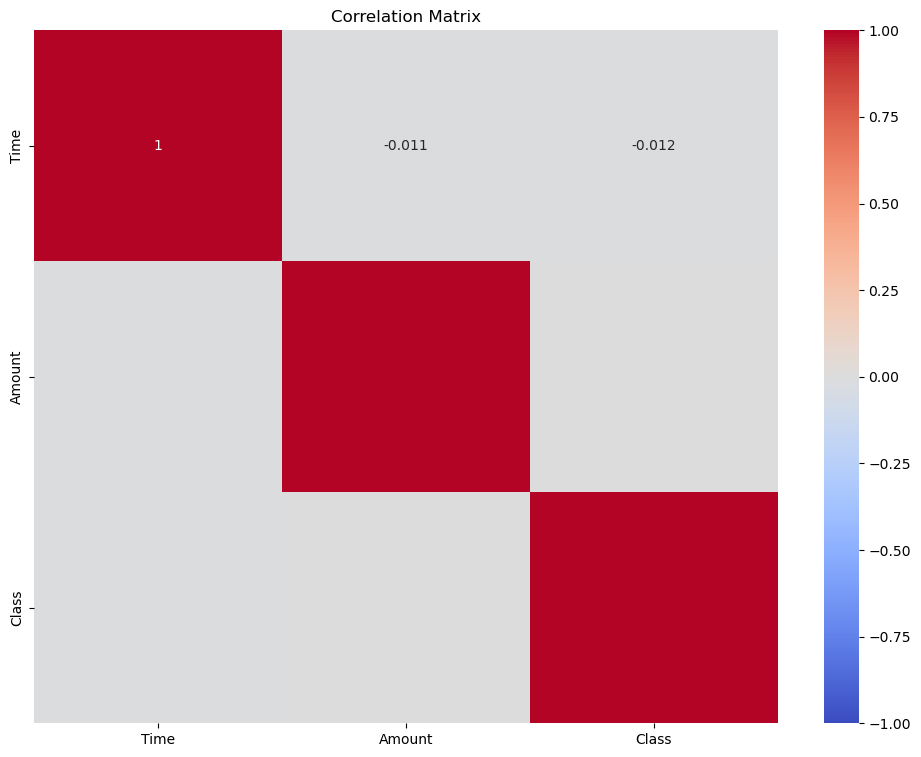

In [23]:
# Correlation Matrix between only Time, Amount and Class with values inside the graph
corrmat = df_modified[['Time', 'Amount', 'Class']].corr()
fig = plt.figure(figsize=(12, 9))
sns.heatmap(corrmat, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()



In [24]:
def plot_top_correlated_features(df, class_name, n_features=4):
    """
    Plot the top n features most correlated with the specified class.
    
    Parameters:
    - df: DataFrame with the data.
    - class_name: Name of the class to compute correlations.
    - n_features: Number of top features to plot (default is 4).
    """
    # Calculate correlation of each feature with the specified class
    feature_correlations = df.corr()[class_name].sort_values(ascending=False)

    # Selecting the top features excluding the specified class
    top_features = feature_correlations.iloc[1:n_features+1].index.tolist()

    # Extracting correlation values for these top features
    top_corr_values = feature_correlations[top_features]

    # Plotting the horizontal line graph
    plt.figure(figsize=(12, 7))
    top_corr_values.plot(kind='barh', color='skyblue')
    plt.title(f'Correlation of Top Features with {class_name}')
    plt.xlabel('Correlation Value')
    plt.ylabel('Feature')
    plt.gca().invert_yaxis()  # To display the highest correlated feature at the top
    plt.show()

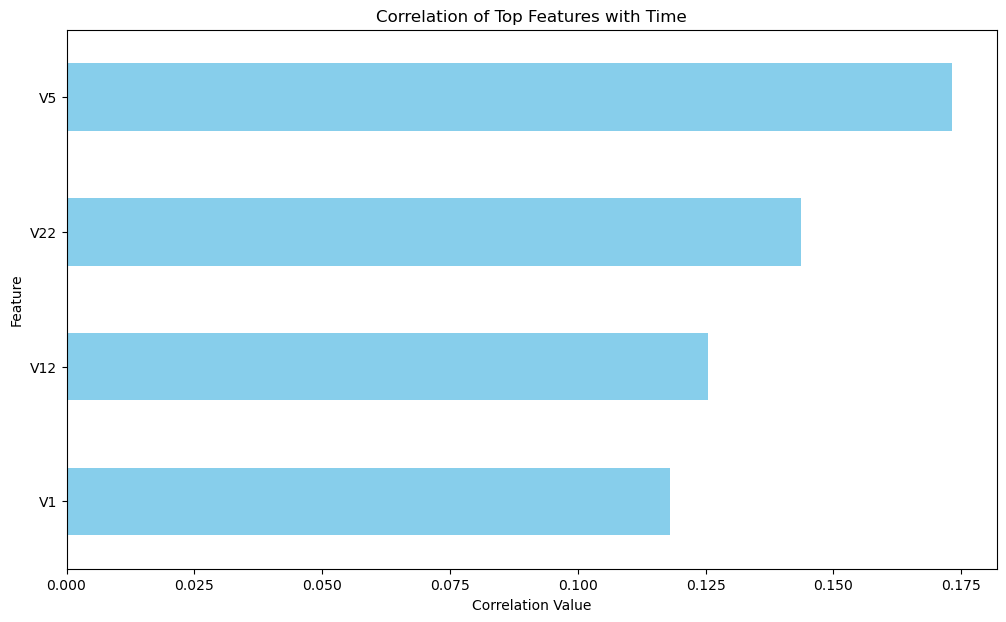

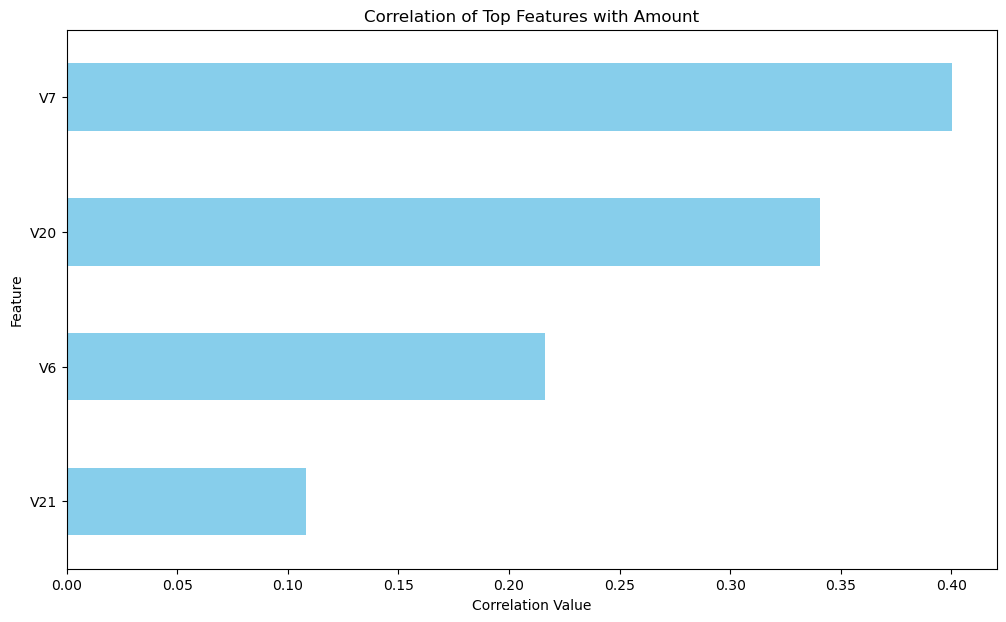

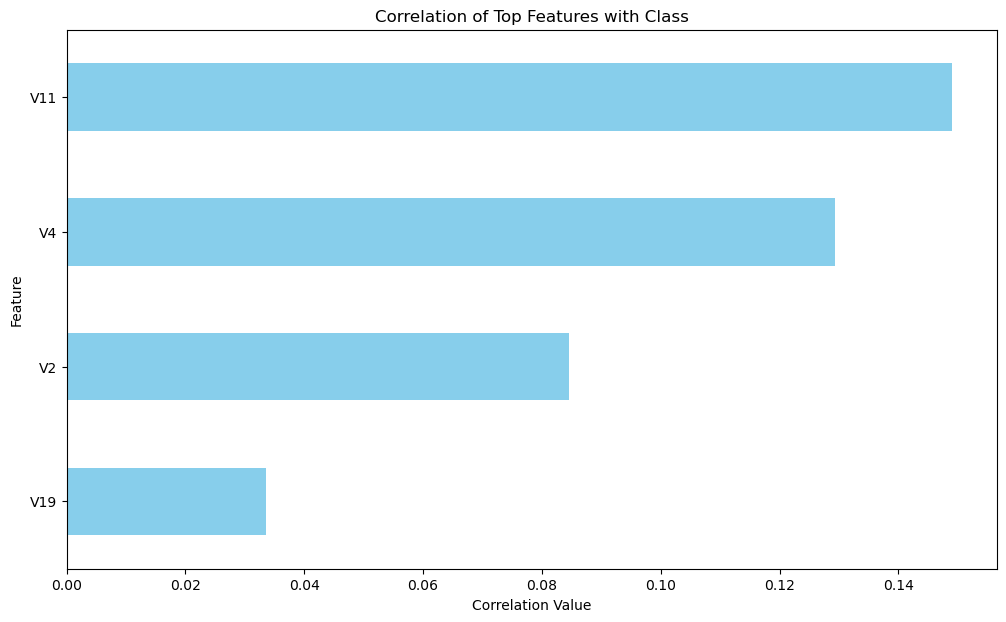

In [25]:
plot_top_correlated_features(df_modified, 'Time')
plot_top_correlated_features(df_modified, 'Amount')
plot_top_correlated_features(df_modified, 'Class')

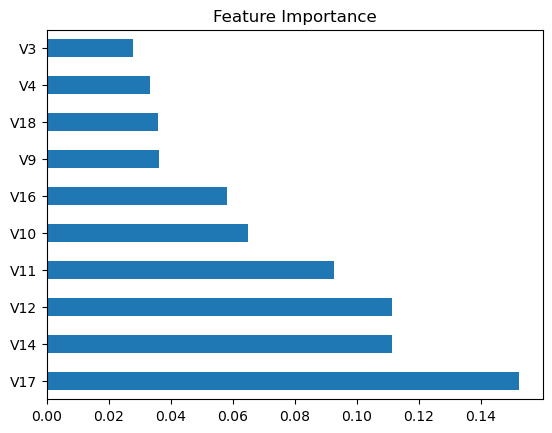

In [26]:
# Feature importance for class Time

from sklearn.ensemble import ExtraTreesClassifier

X = df_modified.iloc[:, :-1]
y = df_modified.iloc[:, -1]

model = ExtraTreesClassifier()
model.fit(X, y)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Feature Importance")
plt.show()


#### Amounts over time distributions 

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_

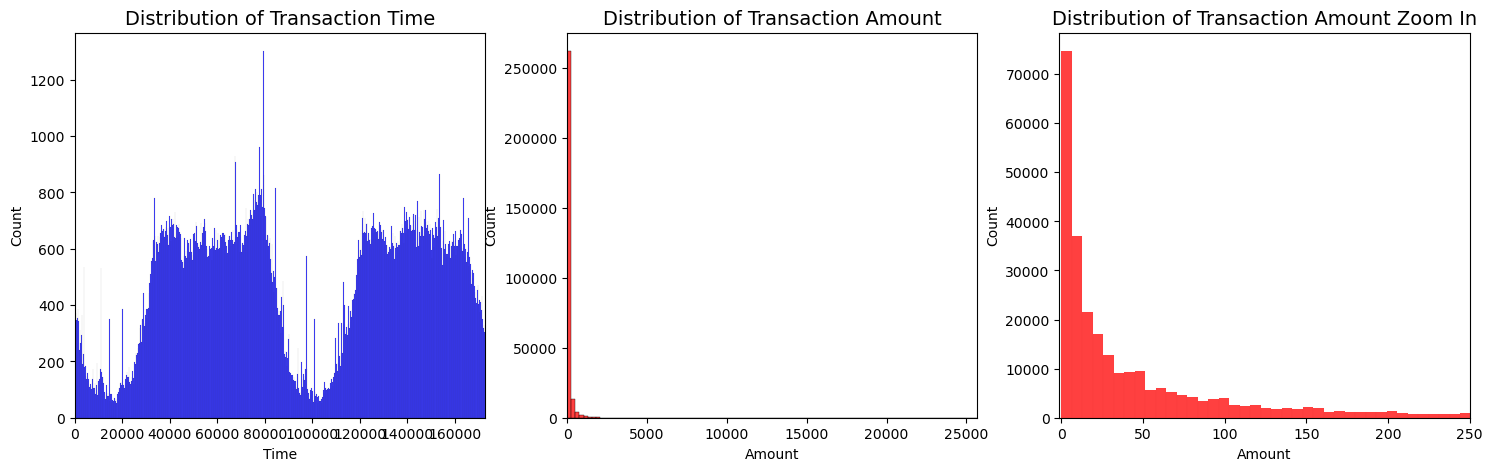

In [27]:
def distributions_over_time_plot(df_modified):
    # Plotting the distribution of 'Time' and 'Amount'
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))

    sns.histplot(df_modified['Time'], ax=ax[0], color='b', bins=600)   
    ax[0].set_title('Distribution of Transaction Time', fontsize=14)
    ax[0].set_xlim([min(df_modified['Time']), max(df_modified['Time'])])

    sns.histplot(df_modified['Amount'], ax=ax[1], color='r', bins=100)  # Adjust the number of bins as needed
    ax[1].set_title('Distribution of Transaction Amount', fontsize=14)
    ax[1].set_xlim([min(df_modified['Amount']), max(df_modified['Amount'])])

    sns.histplot(df_modified['Amount'], ax=ax[2], color='r', bins=4000, kde=False)
    ax[2].set_title('Distribution of Transaction Amount Zoom In', fontsize=14)
    ax[2].set_xlim([-1, 250])

    plt.show()

distributions_over_time_plot(df_modified)

#### Density plots and histograms of transactions (fraud and not) over time 

In [28]:
# Extract 'Time' data for each class
class_0 = df_modified.loc[df_modified['Class'] == 0]["Time"]
class_1 = df_modified.loc[df_modified['Class'] == 1]["Time"]

# Prepare data for the distribution plot
hist_data = [class_0, class_1]
group_labels = ['Valid', 'Fraud']

# Create the distribution plot
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig.update_layout(title='Credit Card Transactions Time Density Plot',
                  xaxis_title='Time [s]',
                  yaxis_title='Density')

# Change colors of the KDE lines for each class
colors = ['green', 'red']
for i, data in enumerate(fig.data):
    fig.data[i].line.color = colors[i]

# Display the plot
pyo.iplot(fig)

In [29]:
# Convert 'Time' to hours
df_modified['hour'] = df_modified['Time'].apply(lambda x: np.ceil(float(x)/3600) % 24)
df_modified['48H'] = df_modified['Time'].apply(lambda x: np.ceil(float(x)/3600) % 48)

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



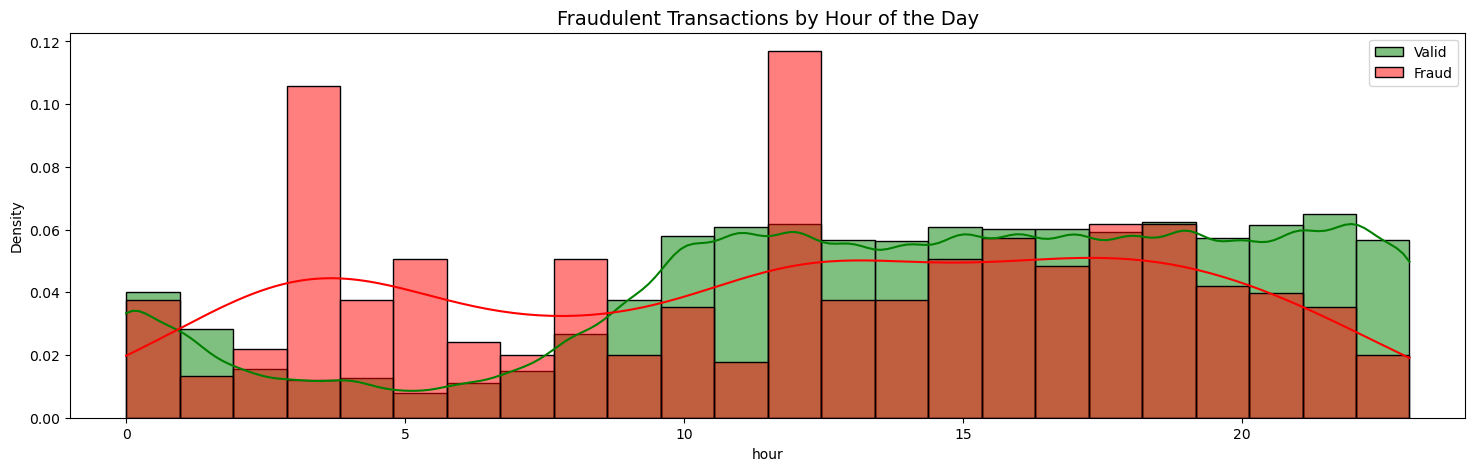

In [30]:


# Create a plot
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

# Histogram and density for Non-Fraud
sns.histplot(df_modified[df_modified['Class'] == 0]['hour'], bins=24, color='g', ax=ax, label='Valid', stat='density', kde=True)

# Histogram and density for Fraud
sns.histplot(df_modified[df_modified['Class'] == 1]['hour'], bins=24, color='r', ax=ax, label='Fraud', stat='density', kde=True)

# Set up the legend, title, and axis limits
ax.legend()
ax.set_title('Fraudulent Transactions by Hour of the Day', fontsize=14)
ax.set_xlim([-1, 24])

plt.show()

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



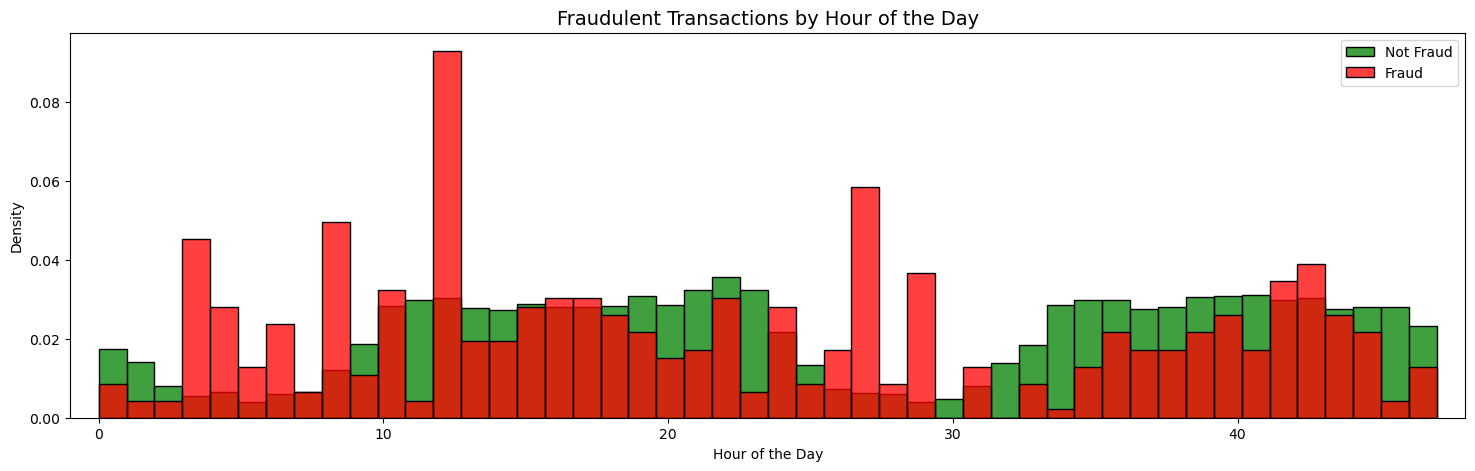

In [31]:
# Histogram based on the amount of money h by hour of the day
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

# Assuming '48H' is a column in df_modified that represents some time-related data over a 48-hour period
# Plotting histograms for Non-Fraudulent Transactions
sns.histplot(df_modified[df_modified['Class'] == 0]['48H'], bins=48, color='g', ax=ax, label='Not Fraud', kde=False, stat='density')

# Plotting histograms for Fraudulent Transactions
sns.histplot(df_modified[df_modified['Class'] == 1]['48H'], bins=48, color='r', ax=ax, label='Fraud', kde=False, stat='density')

# Set legend, title, and axis limits
ax.legend()
ax.set_title('Fraudulent Transactions by Hour of the Day', fontsize=14)
ax.set_xlim([-1, 48])
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Density')

plt.show()

In [32]:
def dist_valid_fraud_count(hh: int, df: pd.DataFrame):
    # Calculating the hour of the day from the 'Time' column
    df['hour'] = df['Time'].apply(lambda x: np.ceil(float(x)/3600) % hh)

    # Setting up the plots
    fig, axs = plt.subplots(2, 1, figsize=(18, 10))

    # Plotting histogram for Non-Fraud (Class 0)
    sns.histplot(df[df['Class'] == 0]['hour'], bins=hh, color='g', ax=axs[0], kde=False)
    axs[0].set_title('Valid Transactions by Hour of the Day', fontsize=14)
    axs[0].set_xlim([-1, hh])
    axs[0].set_xlabel('Hour of the Day')
    axs[0].set_ylabel('Count')

    # Plotting histogram for Fraud (Class 1)
    sns.histplot(df[df['Class'] == 1]['hour'], bins=hh, color='r', ax=axs[1], kde=False)
    axs[1].set_title('Fraudulent Transactions by Hour of the Day', fontsize=14)
    axs[1].set_xlim([-1, hh])
    axs[1].set_xlabel('Hour of the Day')
    axs[1].set_ylabel('Count')

    # Adjusting the layout
    plt.tight_layout()

    # Display the plots
    plt.show()

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



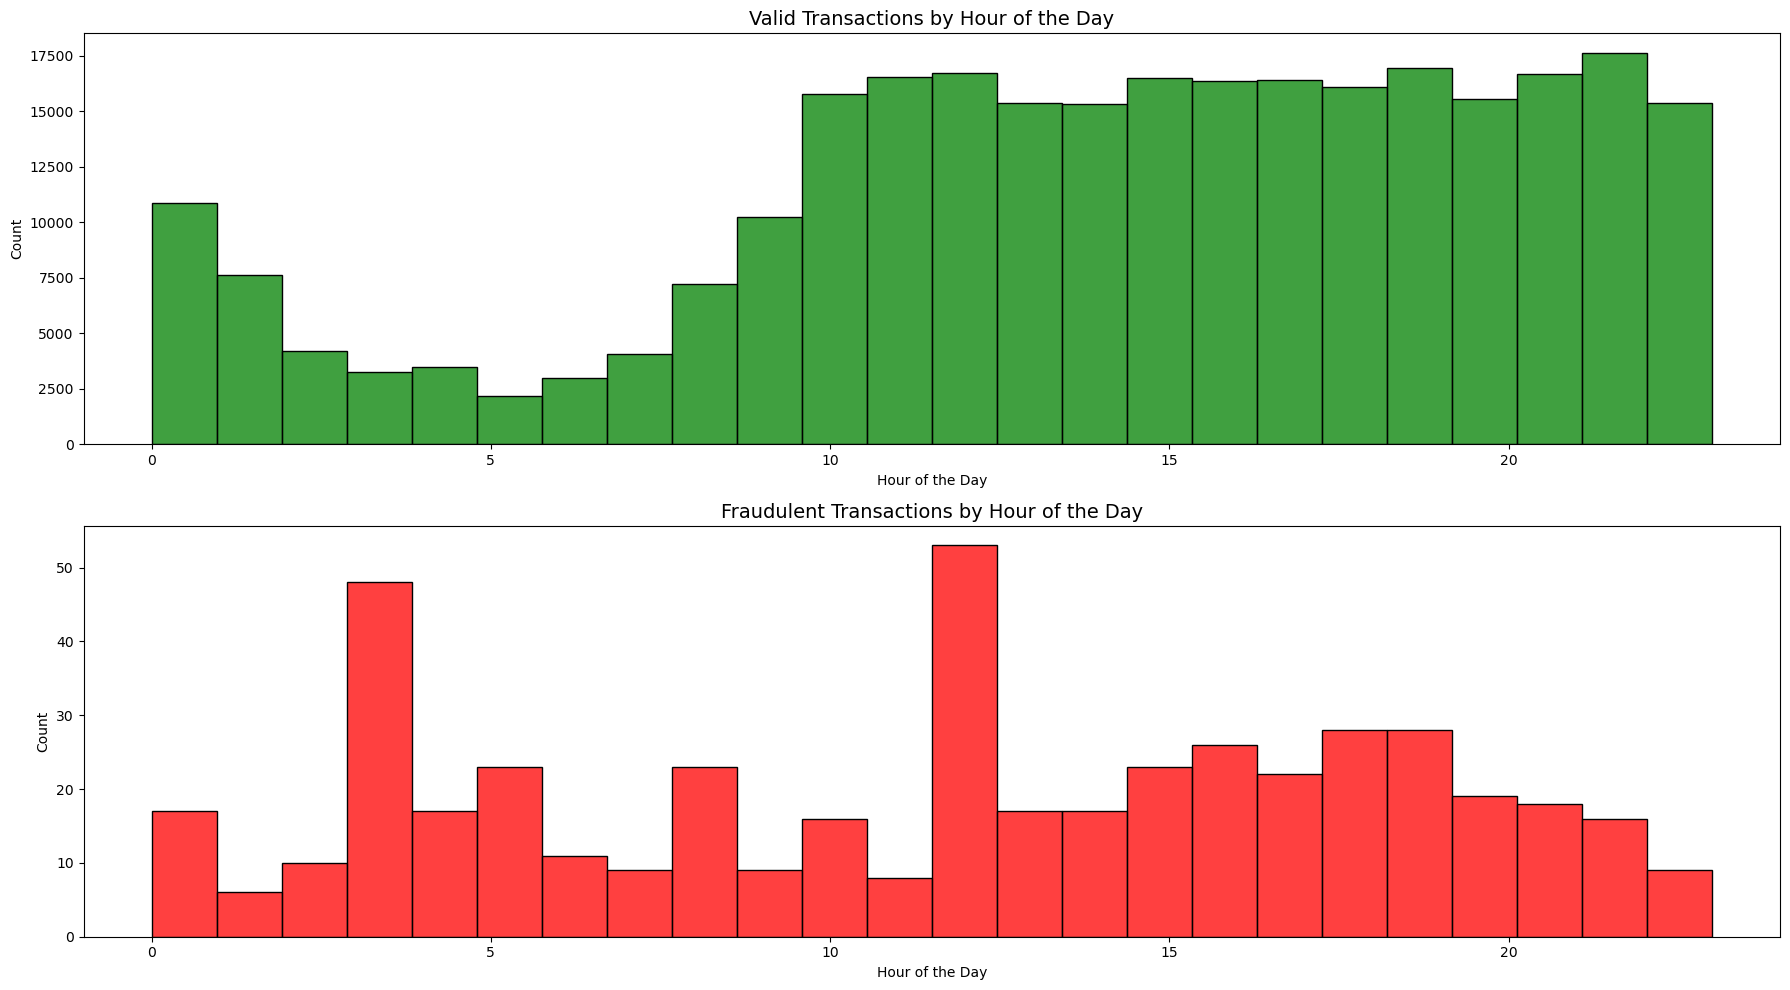

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



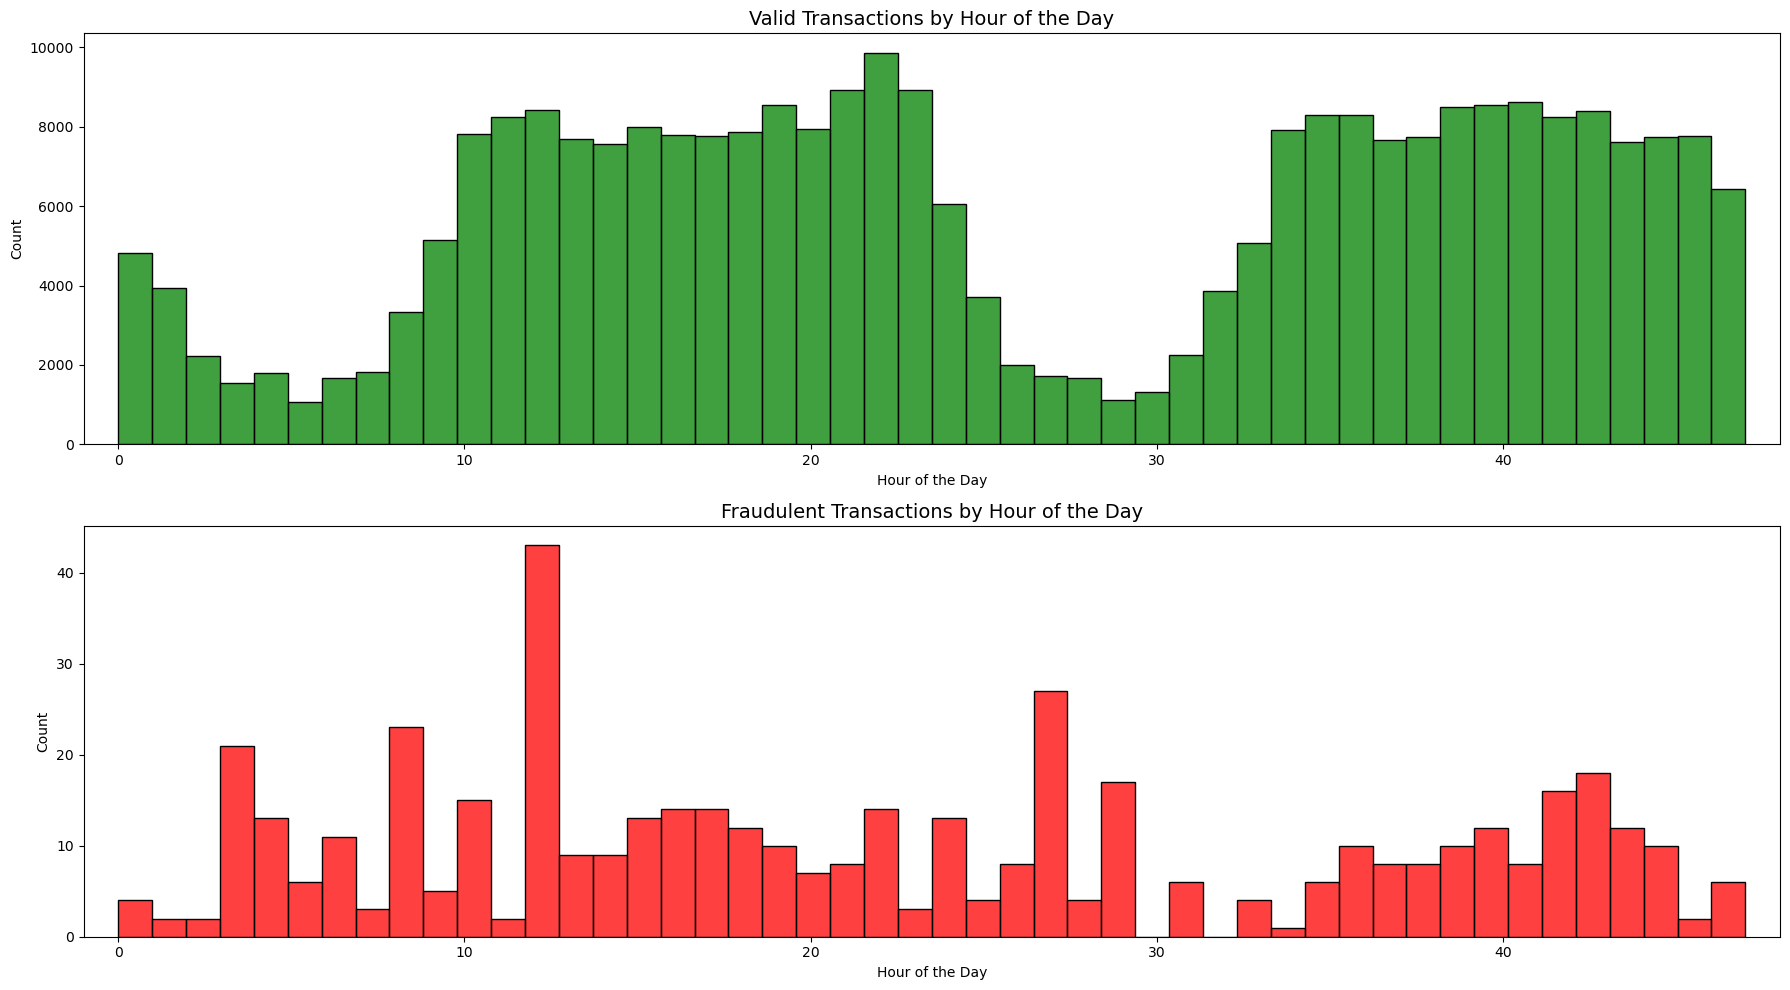

In [33]:
dist_valid_fraud_count(hh=24, df=df_modified)
dist_valid_fraud_count(hh=48, df=df_modified)


#### Top 5 by Range and Class

In [34]:
def bins_incrementation(bin_inc):
    # Define the bins in increments of x
    bins = list(range(0, int(df_modified['Amount'].max()) + bin_inc, bin_inc))

    # Create a 'binned_amount' column in df_modified
    df_modified['binned_amount'] = pd.cut(df_modified['Amount'], bins)

    # For fraud cases
    fraud_counts = df_modified[df_modified['Class'] == 1]['binned_amount'].value_counts().sort_values(ascending=False)
    for i in fraud_counts.index:
        fraud_counts[i] = fraud_counts[i]/sum(fraud_counts)*100
        
    # For non-fraud cases
    non_fraud_counts = df_modified[df_modified['Class'] == 0]['binned_amount'].value_counts().sort_values(ascending=False)
    for i in non_fraud_counts.index:
        non_fraud_counts[i] = non_fraud_counts[i]/sum(non_fraud_counts)*100

    return fraud_counts, non_fraud_counts

In [35]:
# Displaying top 5 common ranges in a plot

def top_amonts(df, _label):
    """Plot of top 5 percentage for amount transactions.

    Args:
        df_ (pd.DataFrame): percentage of rages
    """
    plt.figure(figsize=(12, 9))
    if _label == 'Fraud':
        df.head(5).plot(kind='bar', figsize=(12, 9), color='r')
    else:
        df.head(5).plot(kind='bar', figsize=(12, 9), color='g')
    # put pencentage on top of bars
    for index, value in enumerate(df.head(5)):
        plt.text(index, value + 0.5, str(round(value, 2))+'%')
    plt.xticks(rotation=90)
    plt.xlabel('Amount Range ($)')
    plt.ylabel('Percentage of Transactions')
    plt.title(f'Top 5 Frequency for {_label} Transactions')
    plt.show()


C:\Users\leo_b\AppData\Local\Temp\ipykernel_18772\1866274766.py:11: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '36.38392857142857' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

C:\Users\leo_b\AppData\Local\Temp\ipykernel_18772\1866274766.py:16: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '16.30973105481934' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

C:\Users\leo_b\AppData\Local\Temp\ipykernel_18772\1866274766.py:11: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '47.544642857142854' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

C:\Users\leo_b\AppData\Local\Temp\ipykernel_18772\1866274766.py:16: FutureWarning:

Setting an item of incompatible d

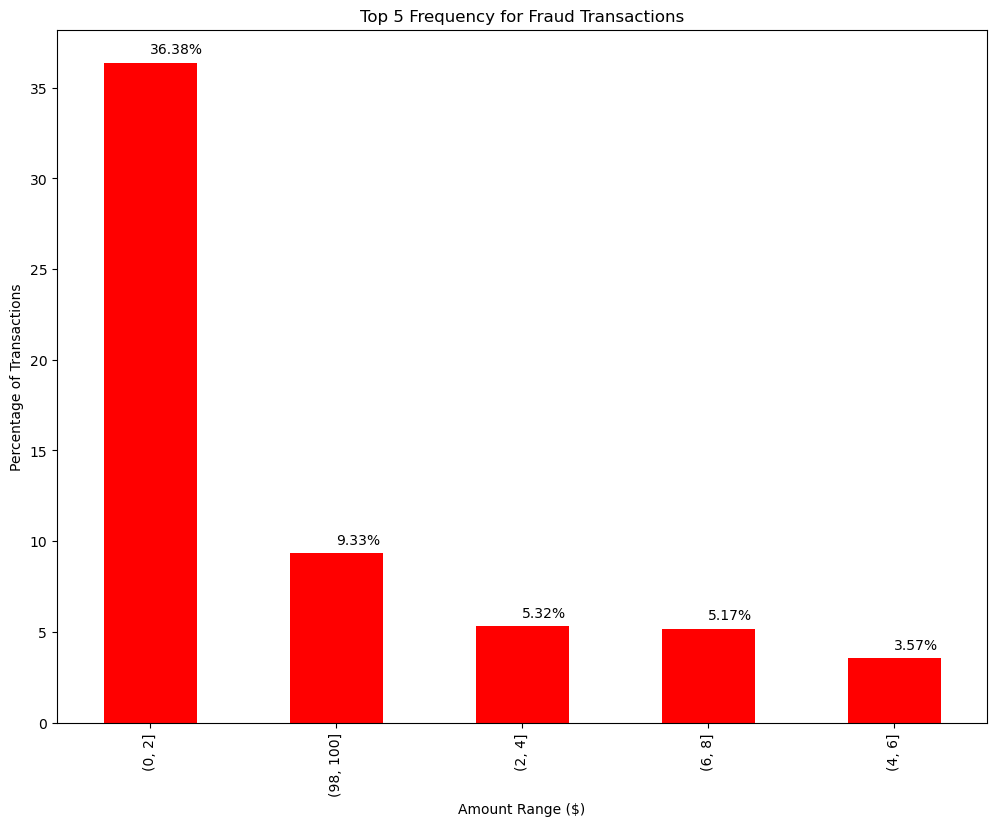

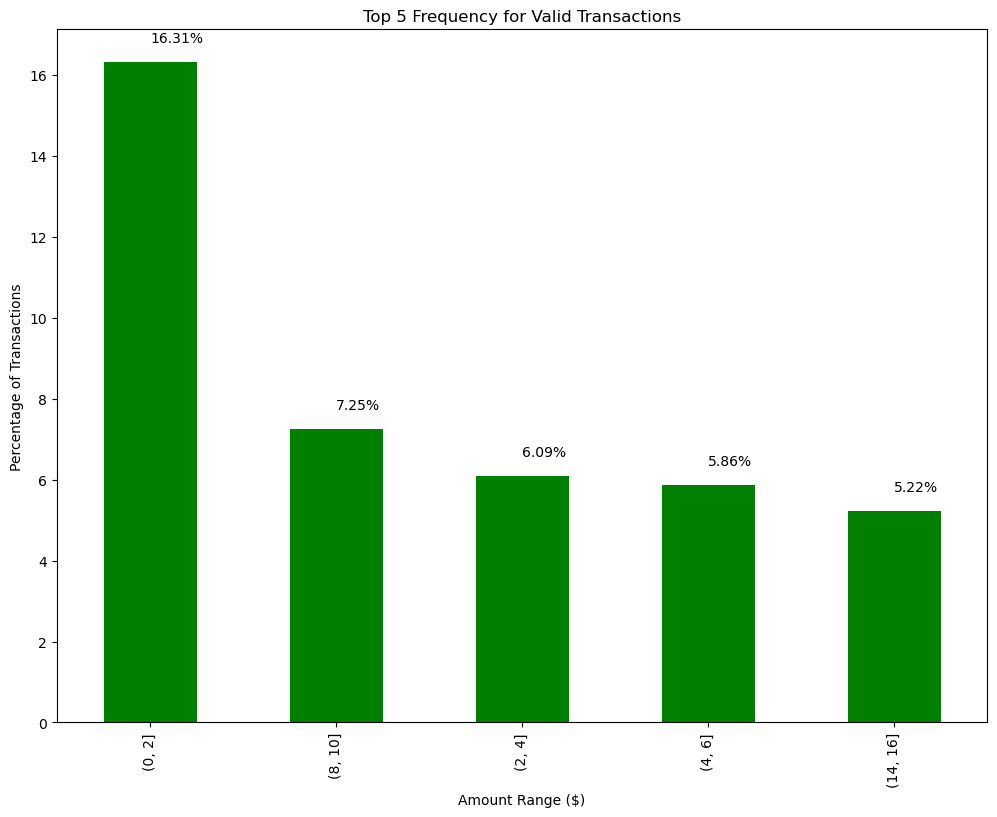

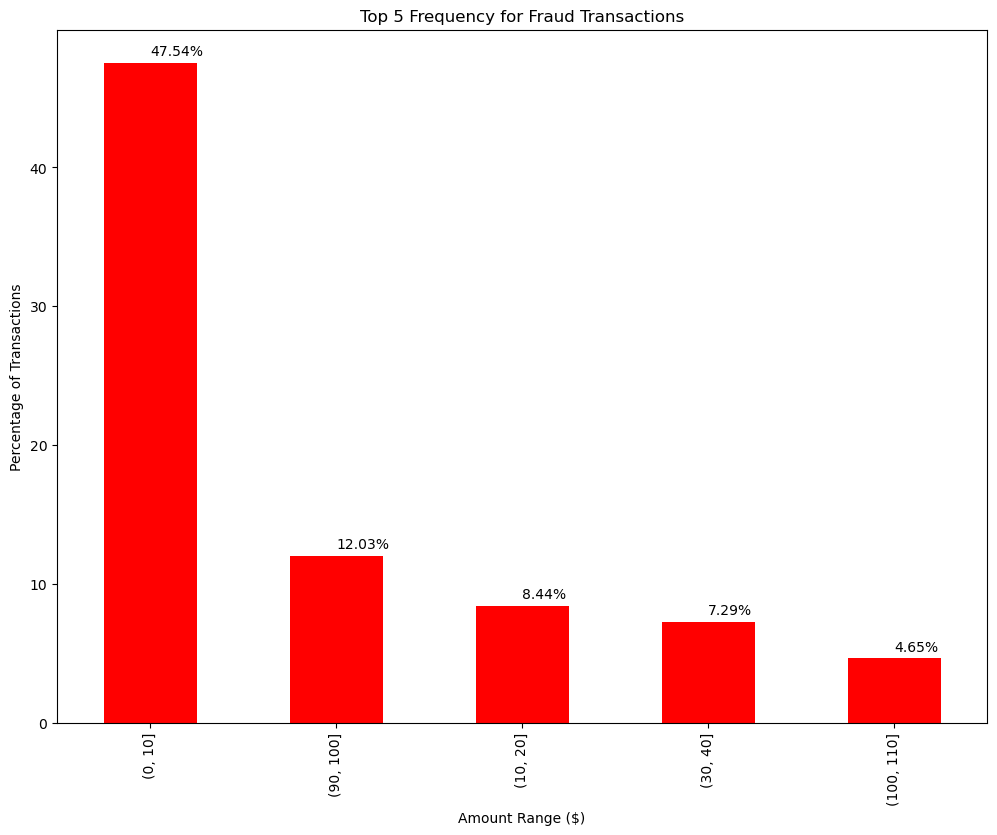

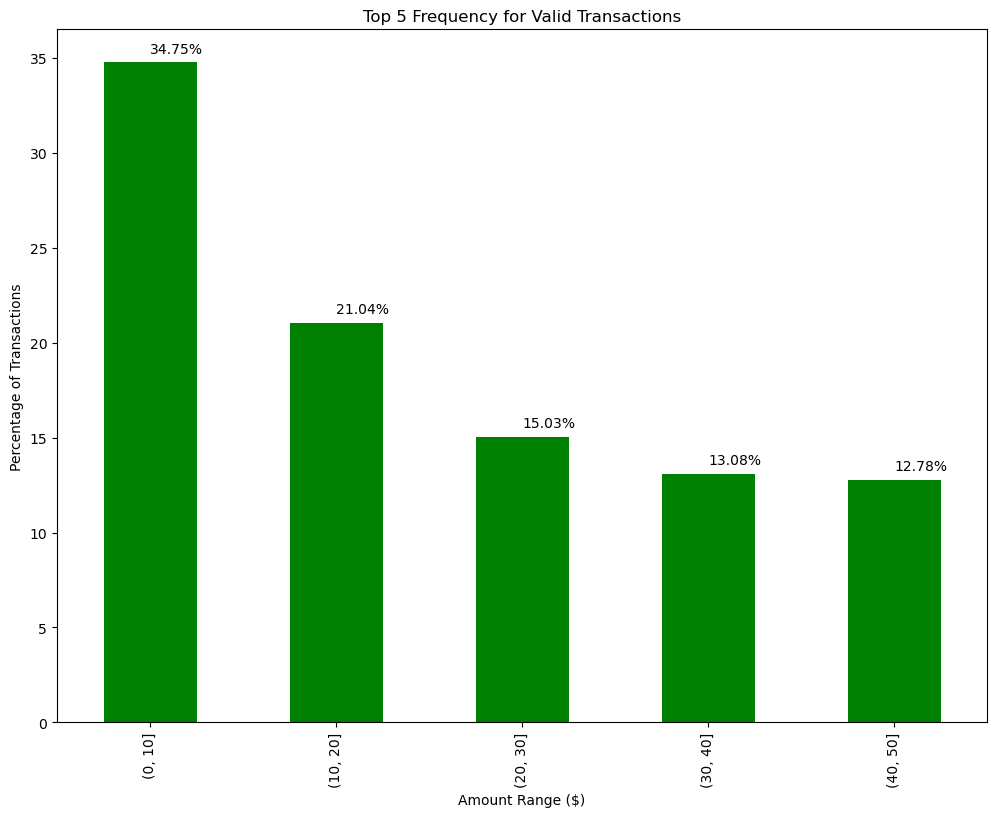

In [36]:
fraud_counts_2, non_fraud_counts_2 = bins_incrementation(2)
fraud_counts_10, non_fraud_counts_10 = bins_incrementation(10)

top_amonts(fraud_counts_2, 'Fraud')
top_amonts(non_fraud_counts_2, 'Valid')
top_amonts(fraud_counts_10, 'Fraud')
top_amonts(non_fraud_counts_10, 'Valid')

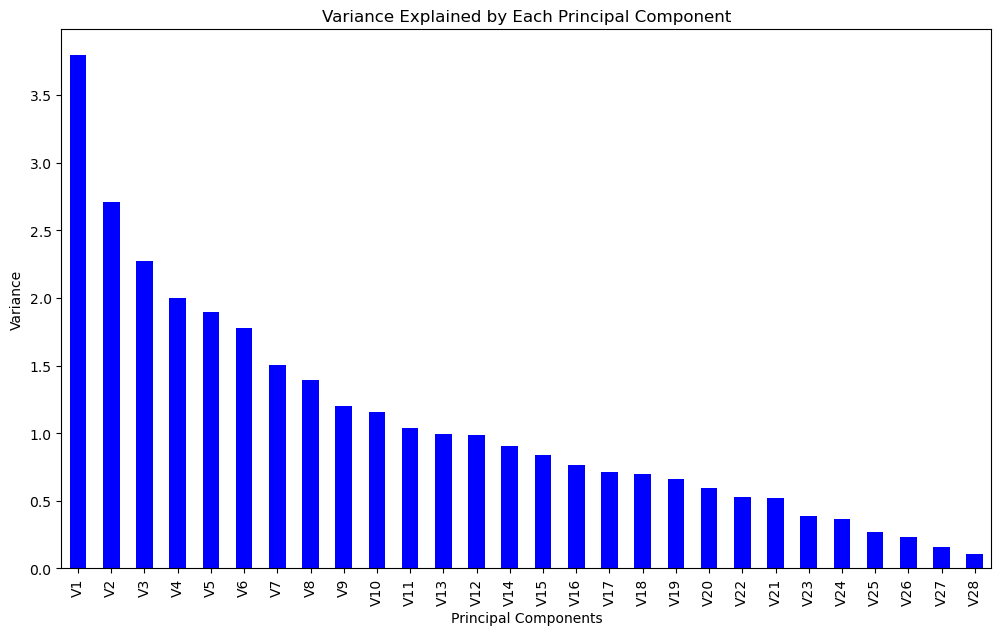

V1    3.794806
V2    2.711631
V3    2.276121
V4    1.999916
V5    1.896152
dtype: float64

In [37]:
#### Variation of the data

# Importing necessary libraries
import numpy as np

# Assuming the PCA-transformed features are named V1, V2, ... Vn
# Extracting only the PCA-transformed features
pca_columns = [col for col in df_modified.columns if 'V' in col]
pca_data = df_modified[pca_columns]

# Calculating the variance for each PCA feature
variances = pca_data.var()

# Sorting the variances in descending order to get top features
sorted_variances = variances.sort_values(ascending=False)

# Plotting the Scree plot
plt.figure(figsize=(12, 7))
sorted_variances.plot(kind='bar', color='blue')
plt.title('Variance Explained by Each Principal Component')
plt.xlabel('Principal Components')
plt.ylabel('Variance')
plt.show()

# Extracting top 5 features with the most variance
top_5_features = sorted_variances.head(5)
top_5_features


#### Groups of Min, Max, Median...

In [38]:
tmp = df_modified.groupby(['hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df_tmp = pd.DataFrame(tmp)
df_tmp.columns = ['hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
df_tmp.head()

,hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.00,10199.44,4826,332608.90,68.920203,14.015,56413.423350
1,0.0,1,0.76,245.00,4,366.18,91.545000,60.210,11459.760833
2,1.0,0,0.00,7712.43,3928,255783.53,65.118007,12.990,45971.242342
3,1.0,1,0.00,529.00,2,529.00,264.500000,264.500,139920.500000
4,2.0,0,0.00,1769.69,2212,145831.70,65.927532,23.040,20079.559909


c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_

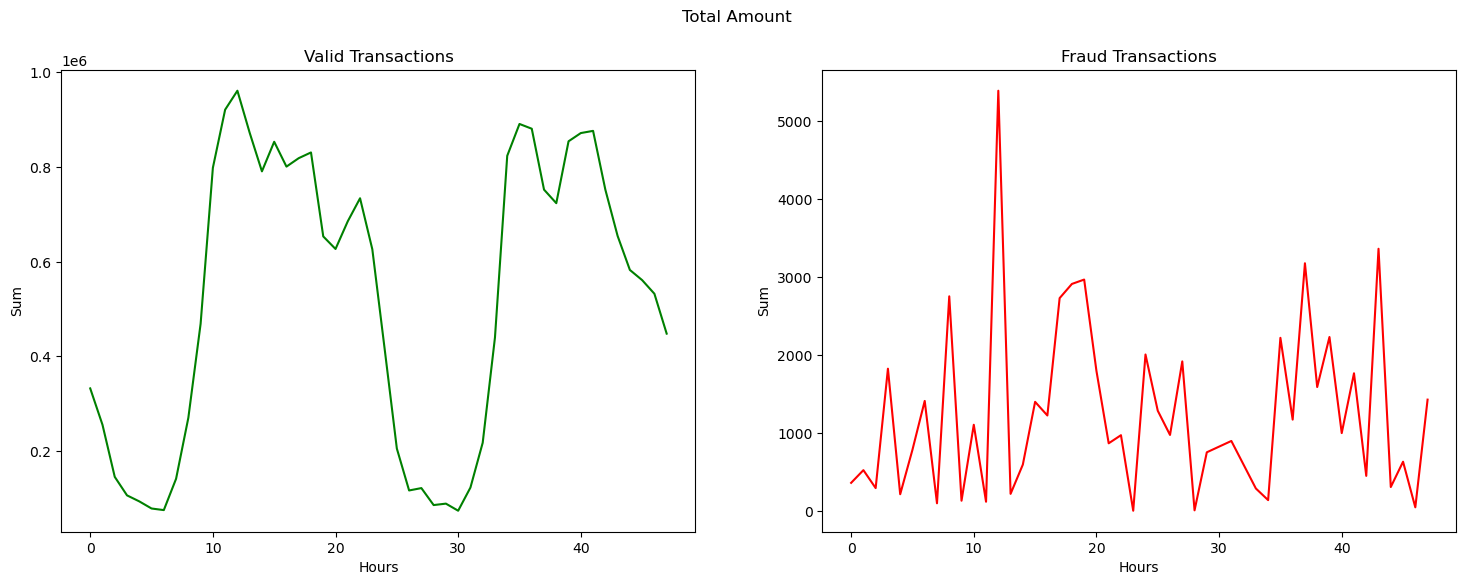

In [39]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="hour", y="Sum", data=df_tmp.loc[df_tmp.Class==0], color="green")
s = sns.lineplot(ax = ax2, x="hour", y="Sum", data=df_tmp.loc[df_tmp.Class==1], color="red")
plt.suptitle("Total Amount")
# add a subtitle to each plot
ax1.set_title("Valid Transactions")
ax2.set_title("Fraud Transactions")
# change x axis label
ax1.set_xlabel("Hours")
ax2.set_xlabel("Hours")
plt.show()



c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_

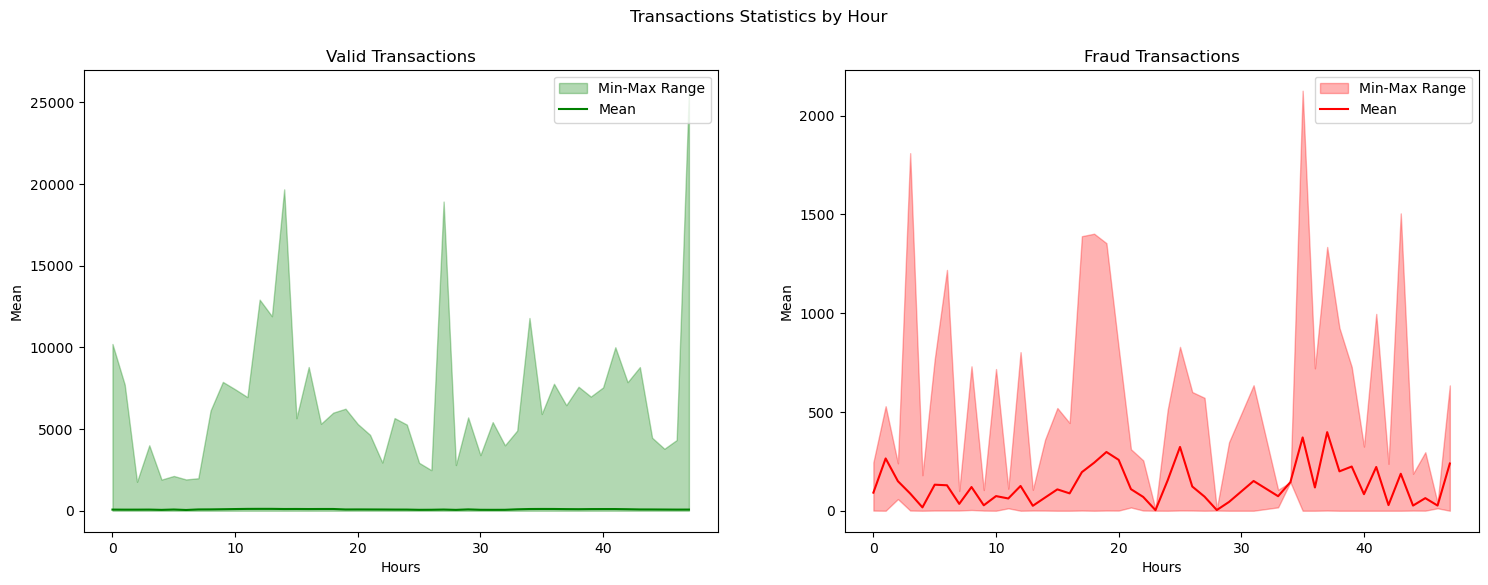

In [40]:
# Sample DataFrame creation (replace this with your actual data)
# df_tmp have 'hour', 'Min', 'Max', and 'Mean' columns, and a 'Class' column to differentiate between Valid and Fraud transactions


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))

# Plot for Non-Fraudulent Transactions
non_fraud = df_tmp.loc[df_tmp.Class == 0]
ax1.fill_between(non_fraud['hour'], non_fraud['Min'], non_fraud['Max'], color='green', alpha=0.3, label='Min-Max Range')
sns.lineplot(ax=ax1, x='hour', y='Mean', data=non_fraud, color='green', label='Mean')

# Plot for Fraudulent Transactions
fraud = df_tmp.loc[df_tmp.Class == 1]
ax2.fill_between(fraud['hour'], fraud['Min'], fraud['Max'], color='red', alpha=0.3, label='Min-Max Range')
sns.lineplot(ax=ax2, x='hour', y='Mean', data=fraud, color='red', label='Mean')

# Add subtitles and labels
ax1.set_title("Valid Transactions")
ax2.set_title("Fraud Transactions")
ax1.set_xlabel("Hours")
ax2.set_xlabel("Hours")

# Display the plot
plt.suptitle("Transactions Statistics by Hour")
ax1.legend()
ax2.legend()
plt.show()

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_

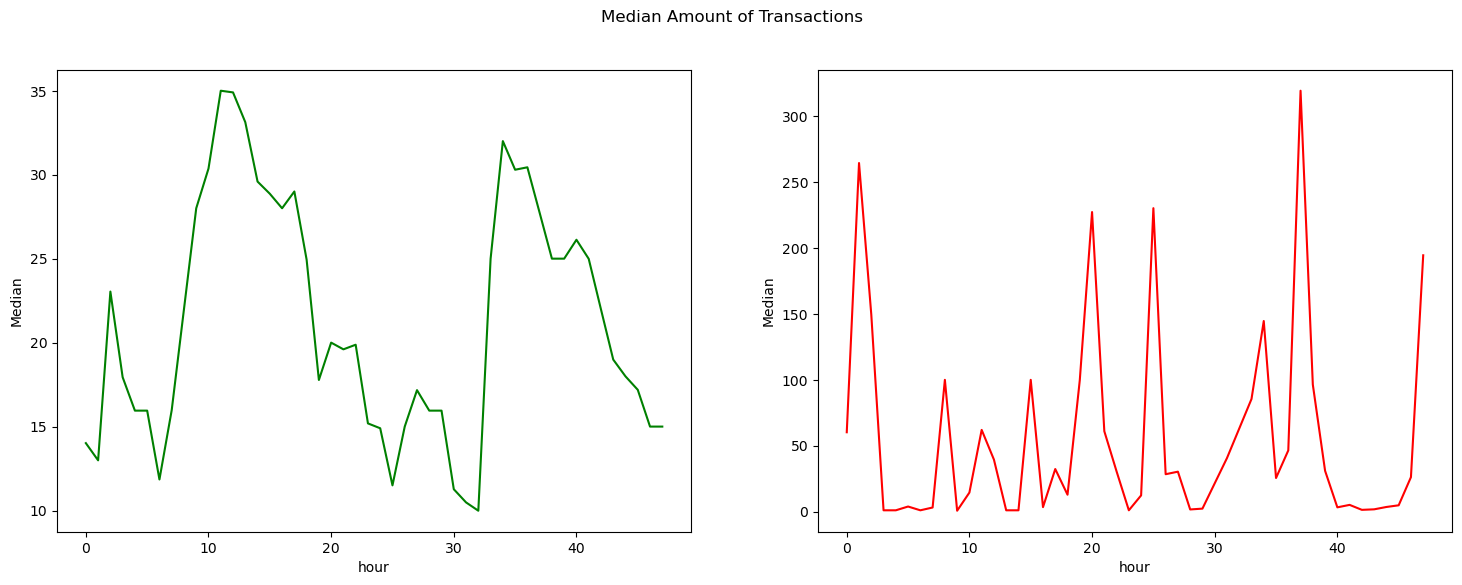

In [41]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="hour", y="Median", data=df_tmp.loc[df_tmp.Class==0], color="green")
s = sns.lineplot(ax = ax2, x="hour", y="Median", data=df_tmp.loc[df_tmp.Class==1], color="red")
plt.suptitle("Median Amount of Transactions")
plt.show()

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_

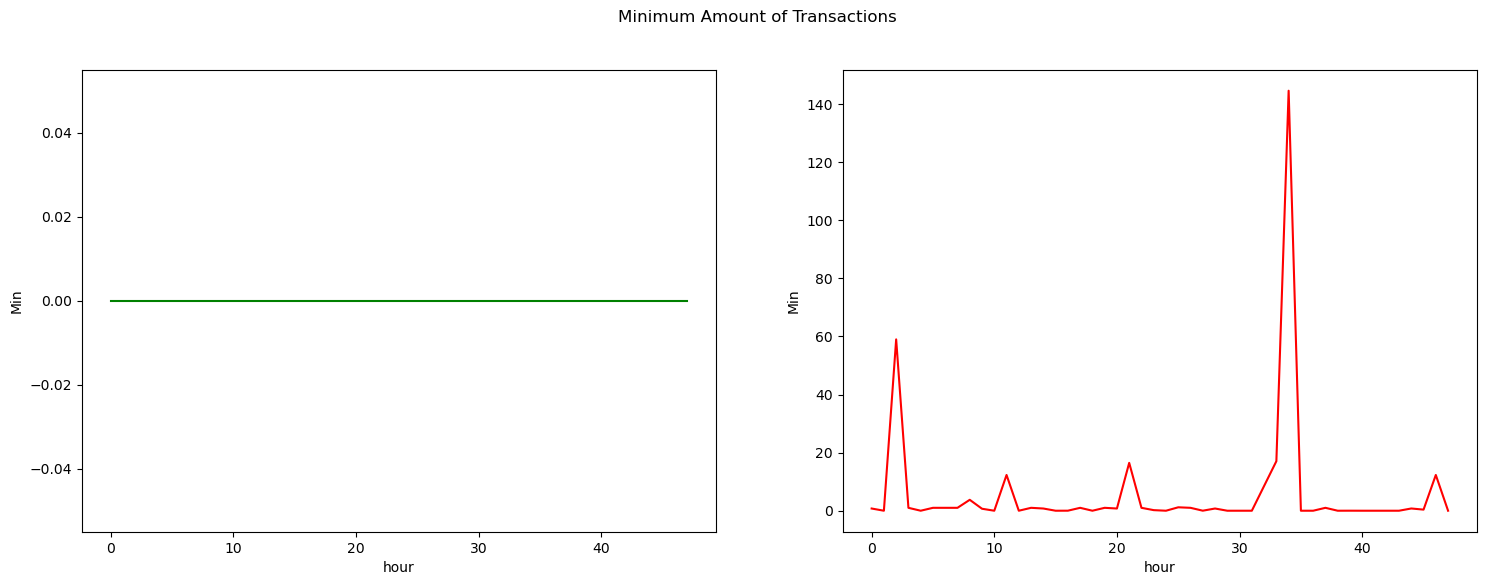

In [42]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="hour", y="Min", data=df_tmp.loc[df_tmp.Class==0], color="green")
s = sns.lineplot(ax = ax2, x="hour", y="Min", data=df_tmp.loc[df_tmp.Class==1], color="red")
plt.suptitle("Minimum Amount of Transactions")
plt.show()

#### Application of logarithm of 10

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_

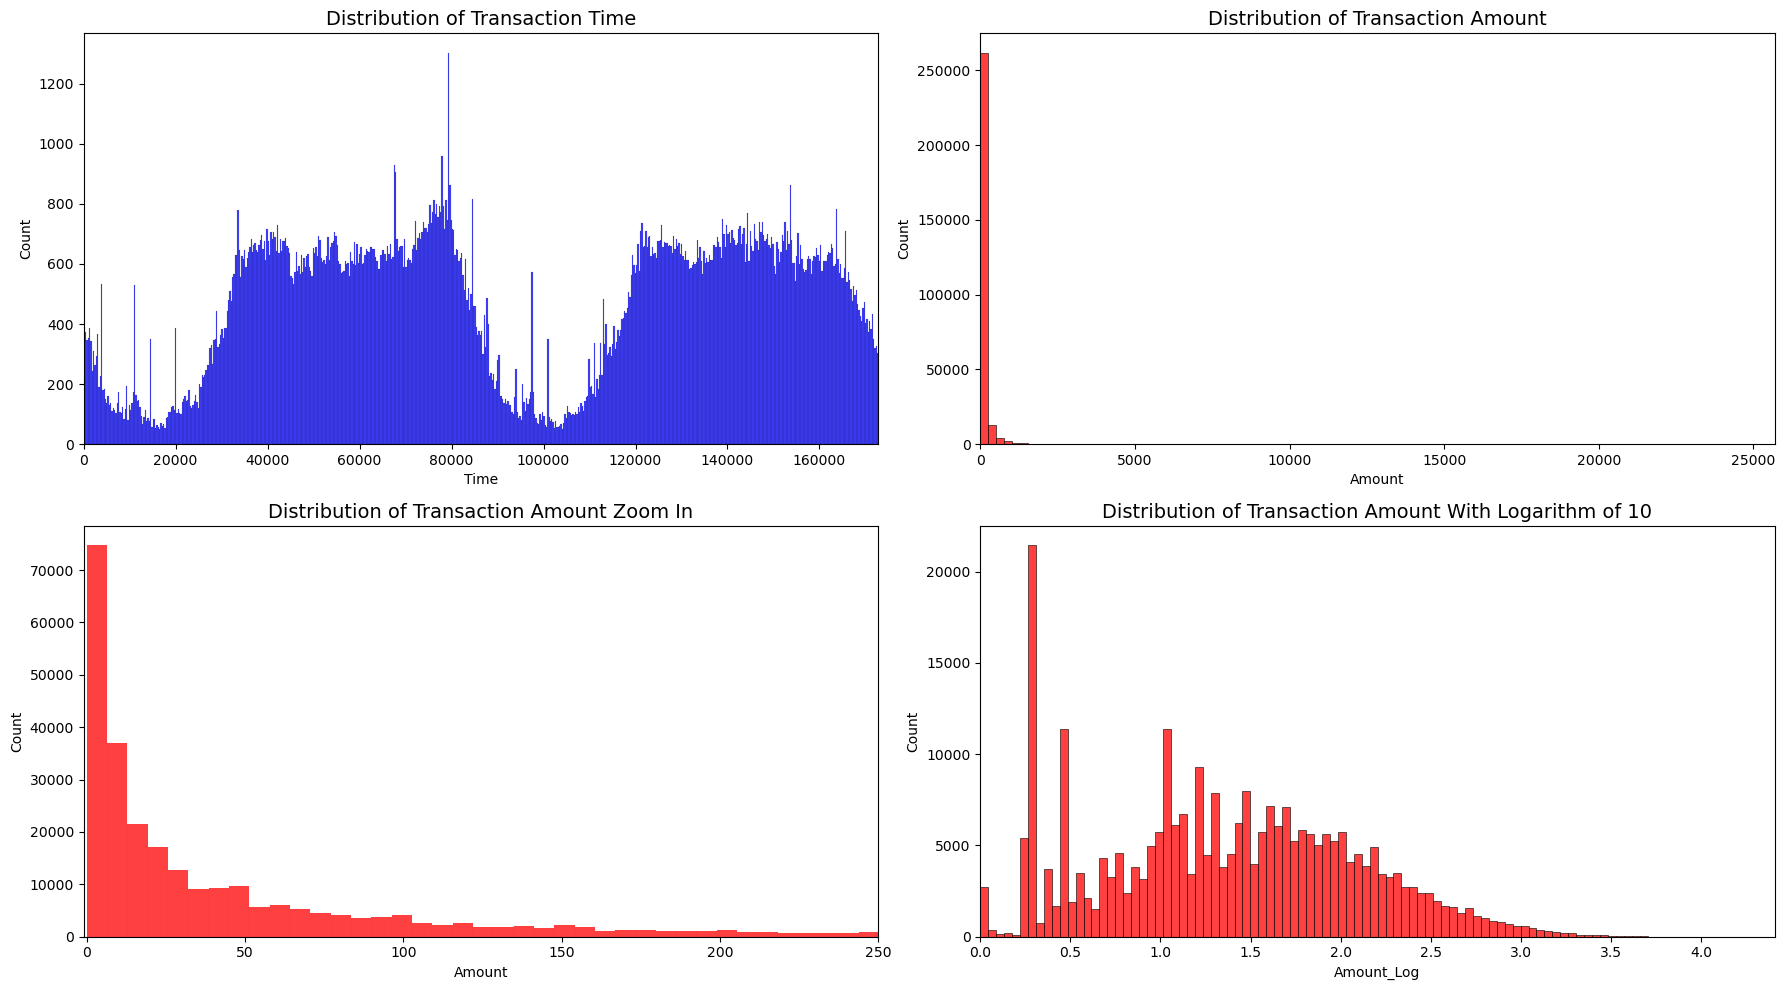

In [43]:
# Apply logarithm of 10 to the amount of money
df_modified['Amount_Log'] = np.log10(df_modified['Amount'] + 1) 

# Setting up the plot
fig, ax = plt.subplots(2, 2, figsize=(18, 10))  # Adjusted figsize for better spacing

# Plotting histograms for each feature
sns.histplot(df_modified['Time'], ax=ax[0, 0], color='b', bins=600)   
ax[0, 0].set_title('Distribution of Transaction Time', fontsize=14)
ax[0, 0].set_xlim([min(df_modified['Time']), max(df_modified['Time'])])

sns.histplot(df_modified['Amount'], ax=ax[0, 1], color='r', bins=100)
ax[0, 1].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0, 1].set_xlim([min(df_modified['Amount']), max(df_modified['Amount'])])

sns.histplot(df_modified['Amount'], ax=ax[1, 0], color='r', bins=4000, kde=False)
ax[1, 0].set_title('Distribution of Transaction Amount Zoom In', fontsize=14)
ax[1, 0].set_xlim([-1, 250])

sns.histplot(df_modified['Amount_Log'], ax=ax[1, 1], color='r', bins=100)
ax[1, 1].set_title('Distribution of Transaction Amount With Logarithm of 10', fontsize=14)
ax[1, 1].set_xlim([min(df_modified['Amount_Log']), max(df_modified['Amount_Log'])])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


#### Fraud analysis by hour of the day

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.

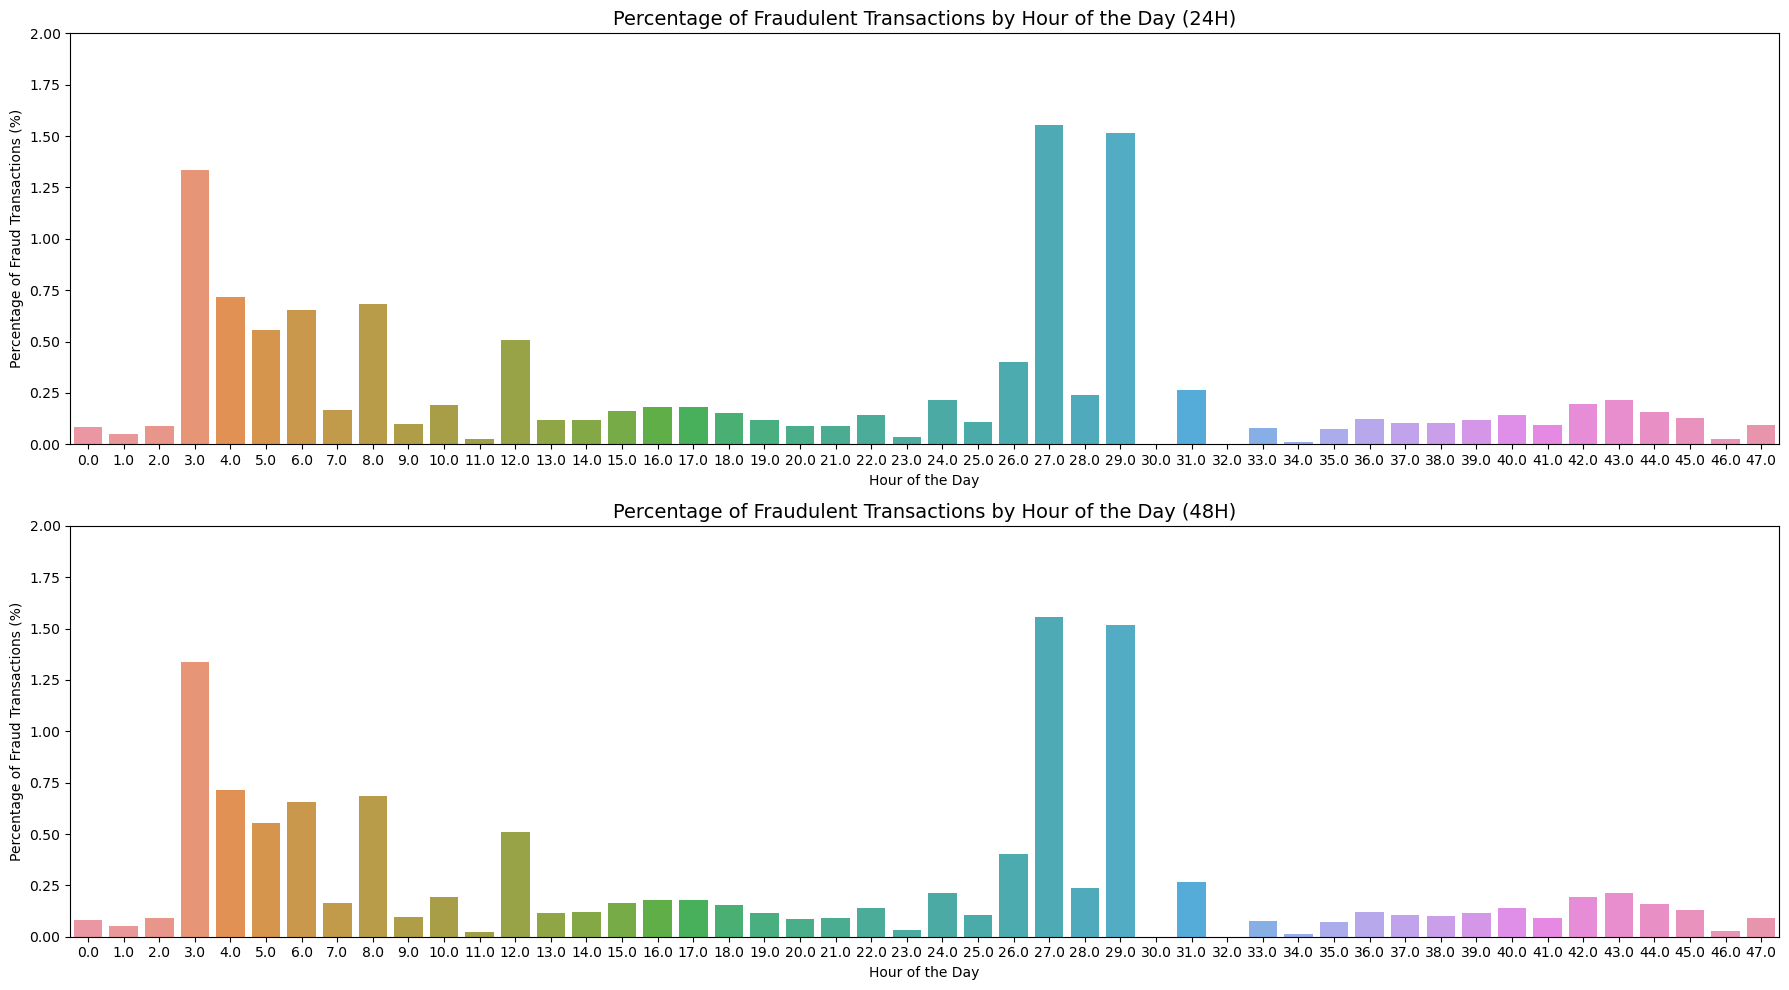

In [44]:
# Group by '48H' and calculate the percentage of fraud transactions
fraud_percentage_by_hour_48 = df_modified.groupby('48H')['Class'].mean() * 100
# Reset index to turn it into a DataFrame
fraud_percentage_by_hour_48 = fraud_percentage_by_hour_48.reset_index()

# Group by '24H' and calculate the percentage of fraud transactions
fraud_percentage_by_hour_24 = df_modified.groupby('hour')['Class'].mean() * 100
fraud_percentage_by_hour_24 = fraud_percentage_by_hour_24.reset_index()

# Plotting
# figure with 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize=(18, 10))

# Plotting the percentage of fraudulent transactions for the 24-hour format
sns.barplot(x='hour', y='Class', ax=ax[0], data=fraud_percentage_by_hour_24)
ax[0].set_title('Percentage of Fraudulent Transactions by Hour of the Day (24H)', fontsize=14)
ax[0].set_xlabel('Hour of the Day')
ax[0].set_ylabel('Percentage of Fraud Transactions (%)')
ax[0].set_ylim(0, 2)  # Adjust the y-axis to show percentages up to 5%

# Plotting the percentage of fraudulent transactions for the 48-hour format
sns.barplot(x='48H', y='Class', ax=ax[1], data=fraud_percentage_by_hour_48)
ax[1].set_title('Percentage of Fraudulent Transactions by Hour of the Day (48H)', fontsize=14)
ax[1].set_xlabel('Hour of the Day')
ax[1].set_ylabel('Percentage of Fraud Transactions (%)')
ax[1].set_ylim(0, 2)  # Adjust the y-axis to show percentages up to 2%

# Adjust layout for better spacing
plt.tight_layout()

plt.show()


c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



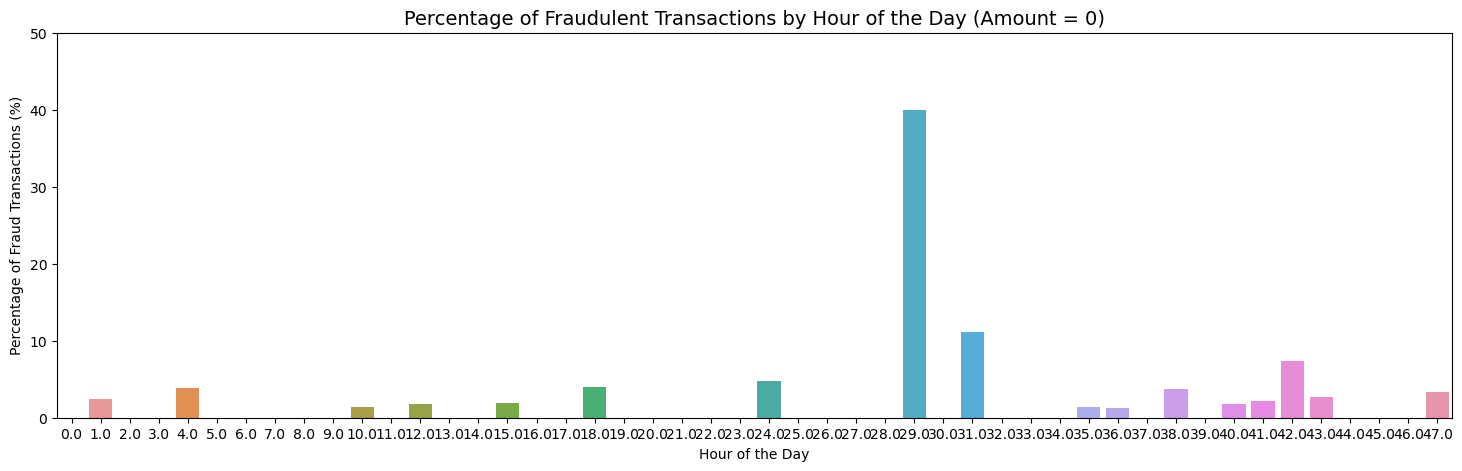

In [45]:
# Filter out transactions where the amount is zero
zero_amount = df_modified[df_modified['Amount'] == 0]


# Group by '48H' and calculate the percentage of fraud transactions
fraud_percentage_by_hour = zero_amount.groupby('hour')['Class'].mean() * 100

# Reset index to turn it into a DataFrame
fraud_percentage_by_hour = fraud_percentage_by_hour.reset_index()

# Plotting
plt.figure(figsize=(18, 5))
sns.barplot(x='hour', y='Class', data=fraud_percentage_by_hour)

plt.title('Percentage of Fraudulent Transactions by Hour of the Day (Amount = 0)', fontsize=14)
plt.xlabel('Hour of the Day')
plt.ylabel('Percentage of Fraud Transactions (%)')
plt.ylim(0, 50)  # Set y-axis to range from 0 to 100 for percentage

plt.show()


In [46]:
import pandas as pd

# Assuming df_modified is your DataFrame and it contains 'Class' and 'Amount' columns

# Filter out transactions where the amount is zero
zero_amount = df_modified[df_modified['Amount'] == 0]

# Calculate the percentage of these transactions that are fraud
percentage_fraud = ((zero_amount['Class'] == 1).mean() * 100)

print(f"Percentage of Fraudulent Transactions with Amount 0: {percentage_fraud:.2f}%")


Percentage of Fraudulent Transactions with Amount 0: 1.38%


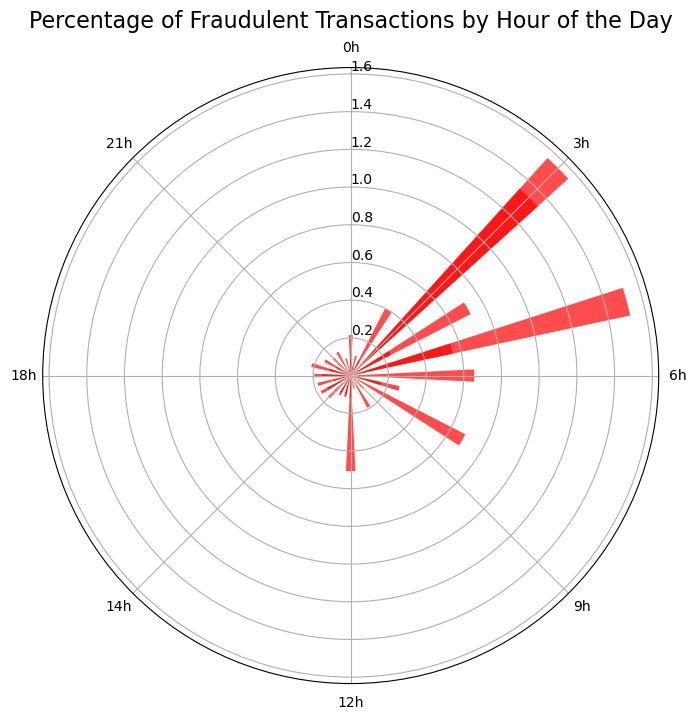

In [47]:
# Clock with fraudlent transactions by hour of the day
# Convert 'hour' to radians for the polar plot
fraud_percentage_by_hour_24['radians'] = (fraud_percentage_by_hour_24['hour']/24) * 2 * np.pi

# Create a polar subplot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))

# Plot the data on the polar subplot
ax.bar(fraud_percentage_by_hour_24['radians'], fraud_percentage_by_hour_24['Class'], width=0.1, color='r', alpha=0.7)

# Set the direction of the zero angle
ax.set_theta_zero_location('N')

# Set the theta direction to clockwise
ax.set_theta_direction(-1)

# Convert the radians back to hours for the tick labels (setting at every 3 hours)
ticks = np.arange(0, 2*np.pi, 3*np.pi/12)
tick_labels = ['{}h'.format(int((tick * 12 / np.pi) % 24)) for tick in ticks]
ax.set_xticks(ticks)
ax.set_xticklabels(tick_labels)

# Set title and labels
ax.set_title('Percentage of Fraudulent Transactions by Hour of the Day', va='bottom', fontsize=16)
ax.set_rlabel_position(0)  # Move radial labels away from plotted line

# Show gridlines
ax.yaxis.grid(True)

# Show the plot
plt.show()


### Outliers

#### Interquartile Range Method

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



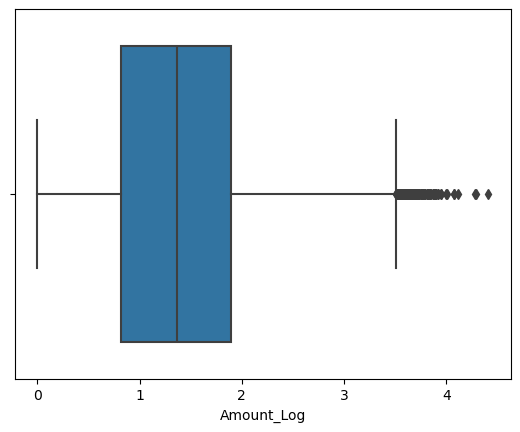

In [48]:
# Discover outliers in the dataset 
# Interquartile range to dataset with boxplot
sns.boxplot(x=df_modified['Amount_Log'])
plt.show()



In [49]:
# Calculate the 25th and 75th percentile of the 'Amount_Log' column
q25, q75 = np.percentile(df_modified['Amount_Log'], 25), np.percentile(df_modified['Amount_Log'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

# Select observations outside the interquartile range
outliers_df_IQR = df_modified[(df_modified['Amount_Log'] < lower) | (df_modified['Amount_Log'] > upper)]

print('Identified outliers: %d' % len(outliers_df_IQR))



Identified outliers: 236


c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



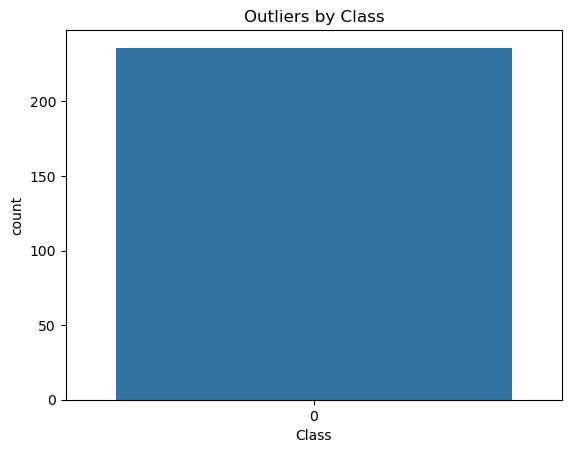

In [50]:
# Bar plot of outliers by class
sns.countplot(x='Class', data=outliers_df_IQR)
plt.title('Outliers by Class')
plt.show()

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



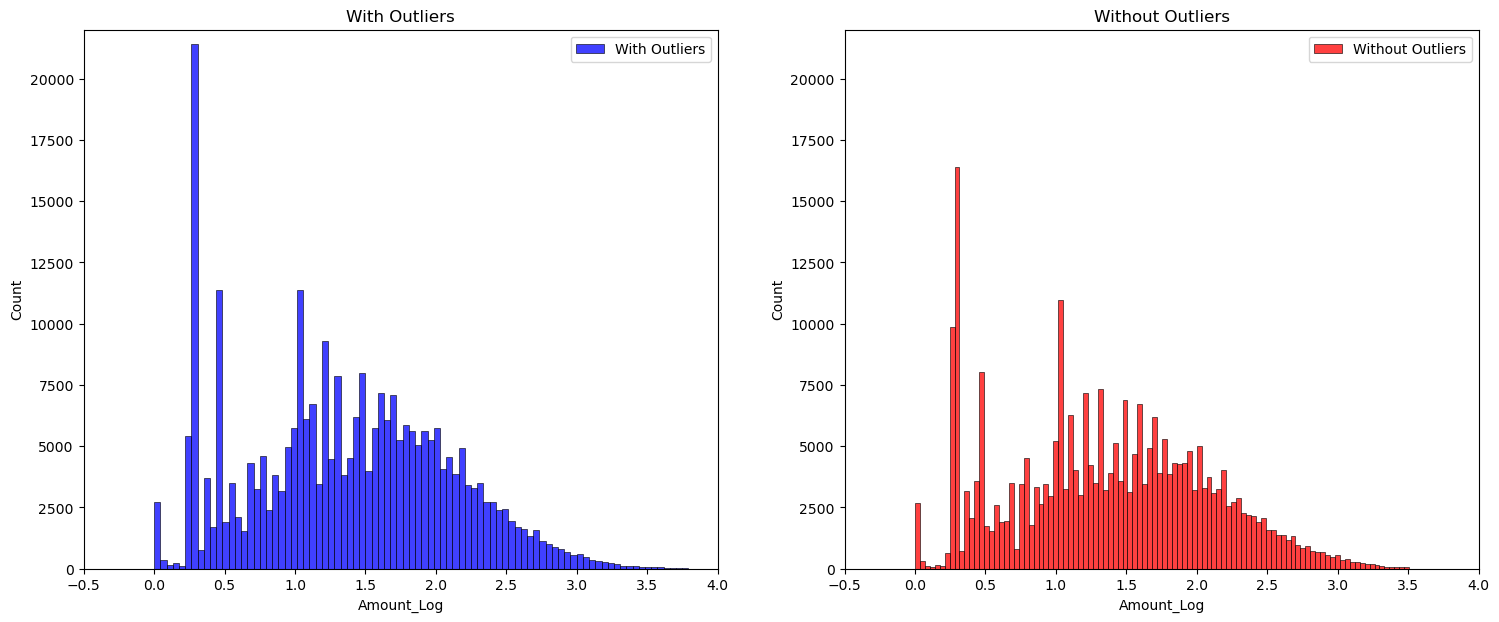

In [51]:
# Remove outliers from the dataset
df_modified_with_outliers = df_modified['Amount_Log'] 
df_modified_without_outliers = df_modified[(df_modified['Amount_Log'] > lower) & (df_modified['Amount_Log'] < upper)]
df_modified_without_outliers = df_modified_without_outliers['Amount_Log']

# Increase the overall figure size
fig, axes = plt.subplots(1, 2, figsize=(18, 7))  # Width, Height in inches

# Check the distribution of the 'Amount_Log' column
# Plot the histogram with outliers
sns.histplot(df_modified_with_outliers, bins=100, color='b', ax=axes[0], label='With Outliers')
axes[0].set_title('With Outliers')

# Plot the histogram without outliers
sns.histplot(df_modified_without_outliers, bins=100, color='r', ax=axes[1], label='Without Outliers')
axes[1].set_title('Without Outliers')

# Add the legend to both subplots
axes[0].legend()
axes[1].legend()

# Define X and Y axis limits
axes[0].set_xlim([-0.5, 4])
axes[1].set_xlim([-0.5, 4])
axes[0].set_ylim([-1, 22000])
axes[1].set_ylim([-1, 22000])


plt.show()

#### Isolation Forest

In [52]:
# Isolation Forest
# Create the IsolationForest model
model = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.002), max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)

# Fit the model
model.fit(df_modified['Amount_Log'].values.reshape(-1, 1))

# Save observations that are outliers
outliers_df_IF = df_modified[model.predict(df_modified['Amount_Log'].values.reshape(-1, 1)) == -1]

# Print the number of identified outliers
print('Identified outliers: %d' % len(outliers_df_IF))


Identified outliers: 511


c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



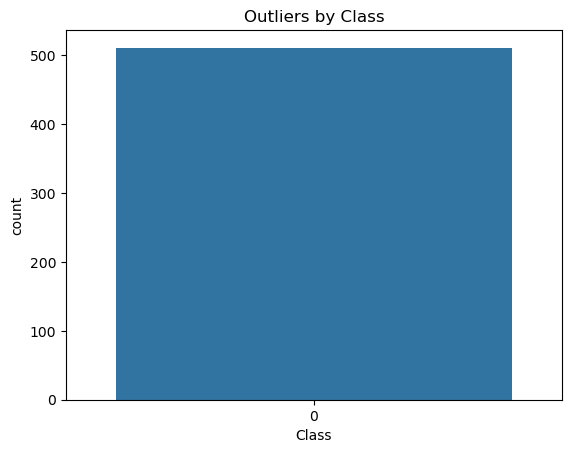

In [53]:
# Distribution of outliers by class
sns.countplot(x='Class', data=outliers_df_IF)
plt.title('Outliers by Class')
plt.show()


#### Hypotesis testing (Grubbs) 

Grubbs' test is defined for the hypothesis:  Ho:  There are no outliers in the data set H1: There is exactly one outlier in the data set 
 
https://www.kaggle.com/code/nareshbhat/outlier-the-silent-killer

In [54]:
def grubbs_test(x):
    n = len(x)
    mean_x = np.mean(x)
    sd_x = np.std(x)
    numerator = max(abs(x-mean_x))
    g_calculated = numerator/sd_x
    print("Grubbs Calculated Value:",g_calculated)
    t_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
    g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))
    print("Grubbs Critical Value:",g_critical)
    if g_critical > g_calculated:
        print("From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outliers\n")
    else:
        print("From grubbs_test we observe that calculated value is greater than critical value, Reject null hypothesis and conclude that there is an outliers\n")

In [55]:
grubbs_test(df_modified['Amount_Log'])  

Grubbs Calculated Value: 4.224414630928075
Grubbs Critical Value: 5.222690991470982
From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outliers



#### Compare Outliers from IF and IQR

In [57]:
# Compare outliers_df_IF and outliers_df_IQR 
# Check if there are any common observations
common_obs = outliers_df_IF[outliers_df_IF.index.isin(outliers_df_IQR.index)]
print('Number of IQR observations: %d' % len(outliers_df_IQR))
print('Number of IF observations: %d' % len(outliers_df_IF))
print('Number of common observations: %d' % len(common_obs))


Number of IQR observations: 236
Number of IF observations: 511
Number of common observations: 236


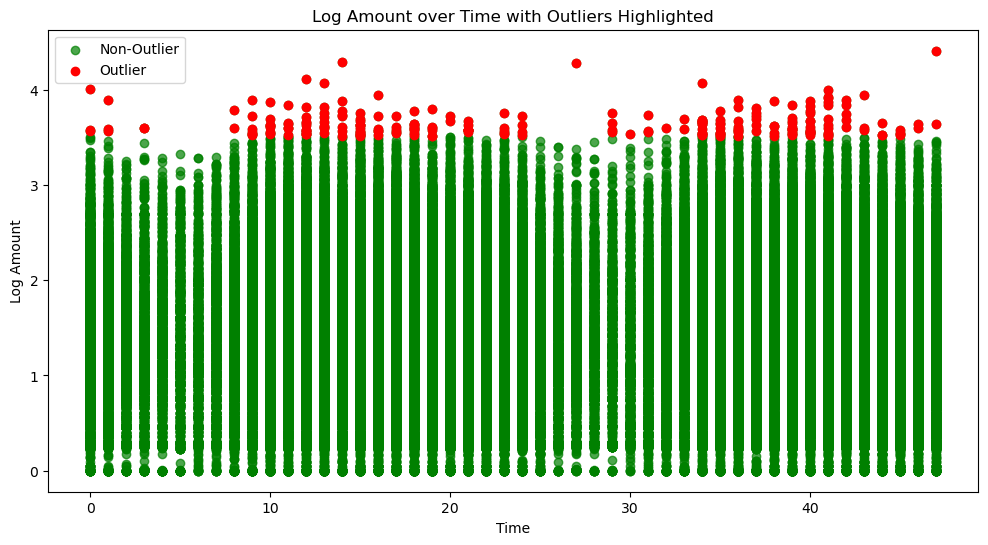

In [63]:
plt.figure(figsize=(12, 6))

# Scatter plot for the full dataset
plt.scatter(df_modified['hour'], df_modified['Amount_Log'], color='green', alpha=0.7, label='Non-Outlier')

# Scatter plot for the outliers
plt.scatter(outliers_df_IQR['hour'], outliers_df_IQR['Amount_Log'], color='red', label='Outlier')

# Labeling
plt.xlabel('Time')
plt.ylabel('Log Amount')
plt.title('Log Amount over Time with Outliers Highlighted')
plt.legend()

plt.show()

## Models

### Baseline Models

#### Libraries

In [84]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import f1_score

In [67]:
# Create a copy of df_modified
df_models = df_modified.copy()

# Drop the 'Time', '48H', 'binned_amount', 'Amount' column
df_models.drop(['Time', '48H', 'binned_amount', 'Amount'], axis=1, inplace=True)

#### Supervised SVM

In [79]:
# Supervised SVM

# Create the X and y datasets
X = df_models.drop(['Class'], axis=1)
y = df_models['Class']

# Split the data into training and testing sets but keep the same class distribution as the original dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=42)

# Create the SVM model
model = SVC()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Print the accuracy score
print('Accuracy:', accuracy_score(y_test, y_pred))

# Print the F1 score
print('F1:', f1_score(y_test, y_pred))

# Print the classification report
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

print(cm)


Accuracy: 0.9993479716632009
F1: 0.7999999999999999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.82      0.78      0.80        95

    accuracy                           1.00     56746
   macro avg       0.91      0.89      0.90     56746
weighted avg       1.00      1.00      1.00     56746

[[56635    16]
 [   21    74]]


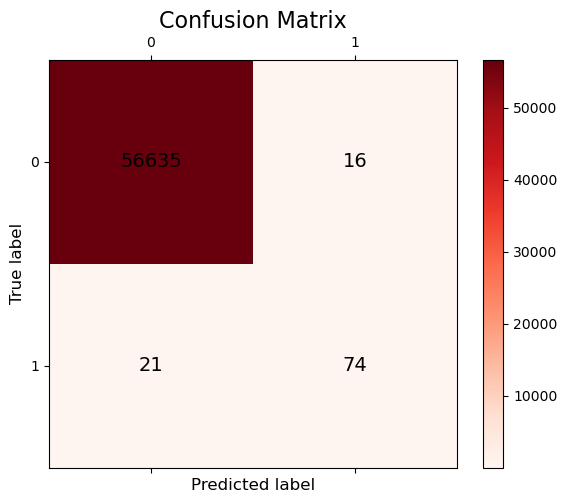

In [83]:
fig, ax = plt.subplots(figsize=(6, 5))  # Adjust the figure size as needed
cax = ax.matshow(cm, cmap='Reds')  # Use matshow to display the matrix

# Add color bar for reference
plt.colorbar(cax)

# Add labels to the plot
for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, val, ha='center', va='center', fontsize=14)

plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.title('Confusion Matrix', fontsize=16)

# Adjust the layout to prevent clipping
plt.tight_layout()
plt.show()

#### Random Forest

In [ ]:
# Random Forest

# Create the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Print the accuracy score
print('Accuracy:', accuracy_score(y_test, y_pred))

# Print the F1 score
print('F1:', f1_score(y_test, y_pred))

# Print the classification report
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

print(cm)


#### Feed-forward NN